In [371]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report ,ConfusionMatrixDisplay
warnings.filterwarnings('ignore')

# EDA

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.manifold import TSNE
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('training_dataset.csv')
train_data

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology   
0      8192       2976      85     23                                95  \
1     14089       3104     233     12                               150   
2     10246       3385     160      7                               937   
3      8686       3191      41     14                               210   
4      9242       2821     297      4                                85   
...     ...        ...     ...    ...                               ...   
8281   9216       3294     328     13                               624   
8282   7129       3390      24      6                               216   
8283   9231       3350     100     18                               175   
8284   9656       3727       5     17                               984   
8285   2017       3379     180      0                               175   

      Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways   
0                                 72                             2436  \
1                                 40                             1503   
2                                204                             1224   
3                                 37                             3207   
4                                  1                              992   
...                              ...                              ...   
8281                             192                             3506   
8282                              13                             3332   
8283                             -26                             2121   
8284                             318                             4934   
8285                              37                             2672   

      Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32   
0               246             193             64  ...            0  \
1               200             251            186  ...            0   
2               228             242            147  ...            0   
3               221             208            119  ...            1   
4               208             238            169  ...            0   
...             ...             ...            ...  ...          ...   
8281            188             224            175  ...            0   
8282            217             226            146  ...            0   
8283            247             212             88  ...            0   
8284            195             204            143  ...            0   
8285            219             238            157  ...            0   

      Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37   
0               0            0            0            0            0  \
1               0            0            0            0            0   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
...           ...          ...          ...          ...          ...   
8281            0            0            0            0            0   
8282            0            0            0            0            1   
8283            0            0            0            0            0   
8284            0            0            0            0            0   
8285            0            0            0            0            0   

      Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0               0            0            0           1  
1               0            0            0           1  
2               0            0            0           1  
3               0            0            0           1  
4               0            0            0           1  
...           ...          ...          ...         ...  
8281            0            0            1           7  
8282            0        

In [3]:
train_data.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology   
0   8192       2976      85     23                                95  \
1  14089       3104     233     12                               150   
2  10246       3385     160      7                               937   
3   8686       3191      41     14                               210   
4   9242       2821     297      4                                85   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways   
0                              72                             2436  \
1                              40                             1503   
2                             204                             1224   
3                              37                             3207   
4                               1                              992   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32   
0            246             193             64  ...            0  \
1            200             251            186  ...            0   
2            228             242            147  ...            0   
3            221             208            119  ...            1   
4            208             238            169  ...            0   

   Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37   
0            0            0            0            0            0  \
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0            0            0            0           1  
1            0            0            0           1  
2            0            0            0           1  
3            0            0            0           1  
4            0            0            0           1  

[5 rows x 56 columns]

In [4]:
train_data.tail()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology   
8281  9216       3294     328     13                               624  \
8282  7129       3390      24      6                               216   
8283  9231       3350     100     18                               175   
8284  9656       3727       5     17                               984   
8285  2017       3379     180      0                               175   

      Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways   
8281                             192                             3506  \
8282                              13                             3332   
8283                             -26                             2121   
8284                             318                             4934   
8285                              37                             2672   

      Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32   
8281            188             224            175  ...            0  \
8282            217             226            146  ...            0   
8283            247             212             88  ...            0   
8284            195             204            143  ...            0   
8285            219             238            157  ...            0   

      Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37   
8281            0            0            0            0            0  \
8282            0            0            0            0            1   
8283            0            0            0            0            0   
8284            0            0            0            0            0   
8285            0            0            0            0            0   

      Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
8281            0            0            1           7  
8282            0            0            0           7  
8283            1            0            0           7  
8284            0            0            1           7  
8285            0            1            0           7  

[5 rows x 56 columns]

In [5]:
train_data.sample(5)

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology   
1655  6654       2558     135     10                               192  \
3690  3793       2132     203     17                                60   
1193   143       2837     112      8                               272   
7880  2085       3261      82     15                                95   
454   8816       3144      81      7                               331   

      Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways   
1655                              32                              579  \
3690                               0                             1317   
1193                              16                             3649   
7880                               7                             2352   
454                               69                             1224   

      Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32   
1655            236             236            131  ...            0  \
3690            210             253            173  ...            0   
1193            235             231            128  ...            0   
7880            240             212             98  ...            0   
454             230             227            129  ...            0   

      Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37   
1655            0            0            0            0            0  \
3690            0            0            0            0            0   
1193            0            0            0            0            0   
7880            0            0            0            0            0   
454             1            0            0            0            0   

      Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
1655            0            0            0           3  
3690            0            0            0           4  
1193            0            0            0           2  
7880            0            1            0           7  
454             0            0            0           2  

[5 rows x 56 columns]

In [6]:
train_data.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8286 entries, 0 to 8285
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  8286 non-null   int64
 1   Elevation                           8286 non-null   int64
 2   Aspect                              8286 non-null   int64
 3   Slope                               8286 non-null   int64
 4   Horizontal_Distance_To_Hydrology    8286 non-null   int64
 5   Vertical_Distance_To_Hydrology      8286 non-null   int64
 6   Horizontal_Distance_To_Roadways     8286 non-null   int64
 7   Hillshade_9am                       8286 non-null   int64
 8   Hillshade_Noon                      8286 non-null   int64
 9   Hillshade_3pm                       8286 non-null   int64
 10  Horizontal_Distance_To_Fire_Points  8286 non-null   int64
 11  Wilderness_Area1                    8286 non-null   int64
 12  Wilder

In [8]:
train_data.describe()

Id    Elevation       Aspect        Slope   
count   8286.000000  8286.000000  8286.000000  8286.000000  \
mean    7609.998431  2732.983104   155.366643    16.868694   
std     4291.741503   432.906958   108.392758     8.514811   
min        1.000000  1863.000000     0.000000     0.000000   
25%     3889.500000  2350.000000    66.000000    10.000000   
50%     7479.500000  2720.500000   125.000000    16.000000   
75%    11349.750000  3099.750000   252.000000    23.000000   
max    15120.000000  3849.000000   360.000000    50.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology   
count                       8286.000000                     8286.000000  \
mean                         225.249698                       53.233888   
std                          213.670866                       62.890107   
min                            0.000000                     -134.000000   
25%                           60.000000                        5.000000   
50%                          175.000000                       34.000000   
75%                          323.000000                       84.000000   
max                         1343.000000                      547.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon   
count                      8286.000000    8286.000000     8286.000000  \
mean                       1629.840574     213.732682      218.534999   
std                        1259.714393      30.675904       23.142959   
min                           0.000000      58.000000       99.000000   
25%                         726.000000     197.000000      206.000000   
50%                        1273.000000     221.000000      222.000000   
75%                        2155.000000     237.000000      235.000000   
max                        6508.000000     254.000000      254.000000   

       Hillshade_3pm  ...  Soil_Type32  Soil_Type33  Soil_Type34  Soil_Type35   
count     8286.00000  ...  8286.000000  8286.000000  8286.000000  8286.000000  \
mean       133.00712  ...     0.035723     0.031620     0.001328     0.008810   
std         46.73019  ...     0.185610     0.174996     0.036413     0.093453   
min          0.00000  ...     0.000000     0.000000     0.000000     0.000000   
25%        103.00000  ...     0.000000     0.000000     0.000000     0.000000   
50%        136.00000  ...     0.000000     0.000000     0.000000     0.000000   
75%        166.00000  ...     0.000000     0.000000     0.000000     0.000000   
max        248.00000  ...     1.000000     1.000000     1.000000     1.000000   

       Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40   
count  8286.000000  8286.000000  8286.000000  8286.000000  8286.000000  \
mean      0.000845     0.003259     0.063481     0.056119     0.040068   
std       0.029055     0.056994     0.243840     0.230165     0.196130   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        Cover_Type  
count  8286.000000  
mean      4.561550  
std       1.789533  
min       1.000000  
25%       3.000000  
50%       5.000000  
75%       6.000000  
max       7.000000  

[8 rows x 56 columns]

In [9]:
train_data.skew()

Id                                     0.046853
Elevation                              0.231034
Aspect                                 0.486825
Slope                                  0.481654
Horizontal_Distance_To_Hydrology       1.563164
Vertical_Distance_To_Hydrology         1.489166
Horizontal_Distance_To_Roadways        1.287637
Hillshade_9am                         -1.134396
Hillshade_Noon                        -0.922196
Hillshade_3pm                         -0.311391
Horizontal_Distance_To_Fire_Points     1.597119
Wilderness_Area1                       1.450438
Wilderness_Area2                       5.458321
Wilderness_Area3                       0.287803
Wilderness_Area4                       0.703206
Soil_Type1                             6.088352
Soil_Type2                             4.356065
Soil_Type3                             3.374927
Soil_Type4                             3.614907
Soil_Type5                             9.129863
Soil_Type6                             4

In [10]:
train_data.groupby('Cover_Type').size()

Cover_Type
1     347
2     861
3    1385
4    1368
5    1569
6    1036
7    1720
dtype: int64

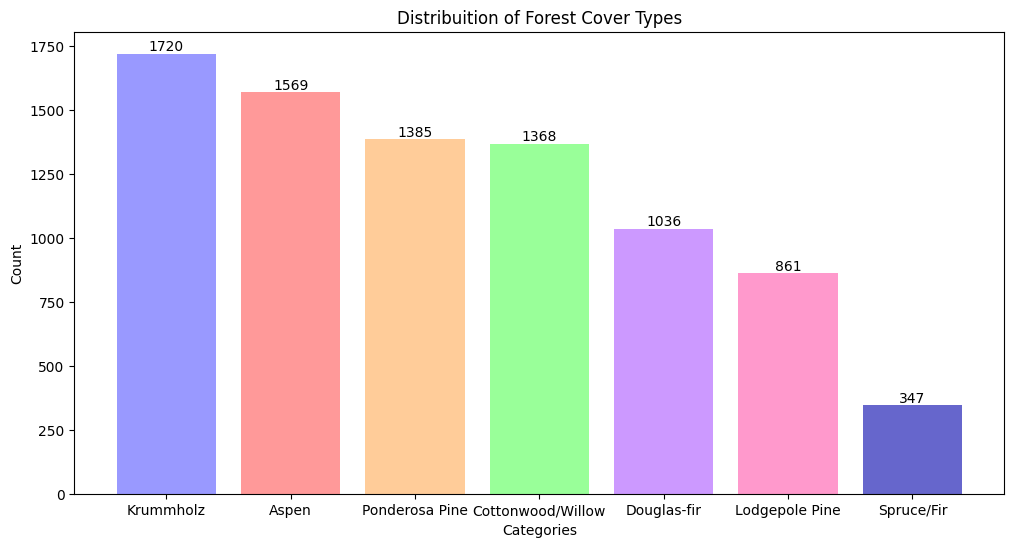

Cover_Type
Krummholz            1720
Aspen                1569
Ponderosa Pine       1385
Cottonwood/Willow    1368
Douglas-fir          1036
Lodgepole Pine        861
Spruce/Fir            347
Name: count, dtype: int64

In [11]:
cover_type_name = train_data.Cover_Type.map({1: 'Spruce/Fir', 2:'Lodgepole Pine', 3:'Ponderosa Pine', 4:'Cottonwood/Willow', 5:'Aspen', 6:'Douglas-fir', 7:'Krummholz'})

target_counts = cover_type_name.value_counts()
# Include the Spam class & set its count to 0

pleasant_color_palette = [
    '#9999FF',  # Light Blue
    '#FF9999',  # Light Red
    '#FFCC99',  # Light Orange
    '#99FF99',  # Light Green
    '#CC99FF',  # Light Purple
    '#FF99CC',  # Light Pink
    '#6666CC',  # Dark Blue
]

plt.figure(figsize=(12, 6))

# Create a bar chart
plt.bar(target_counts.index, target_counts.values, color = pleasant_color_palette)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Distribuition of Forest Cover Types')

# Add value labels to each bar
for i, count in enumerate(target_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
    
# Display the chart
plt.show()
target_counts

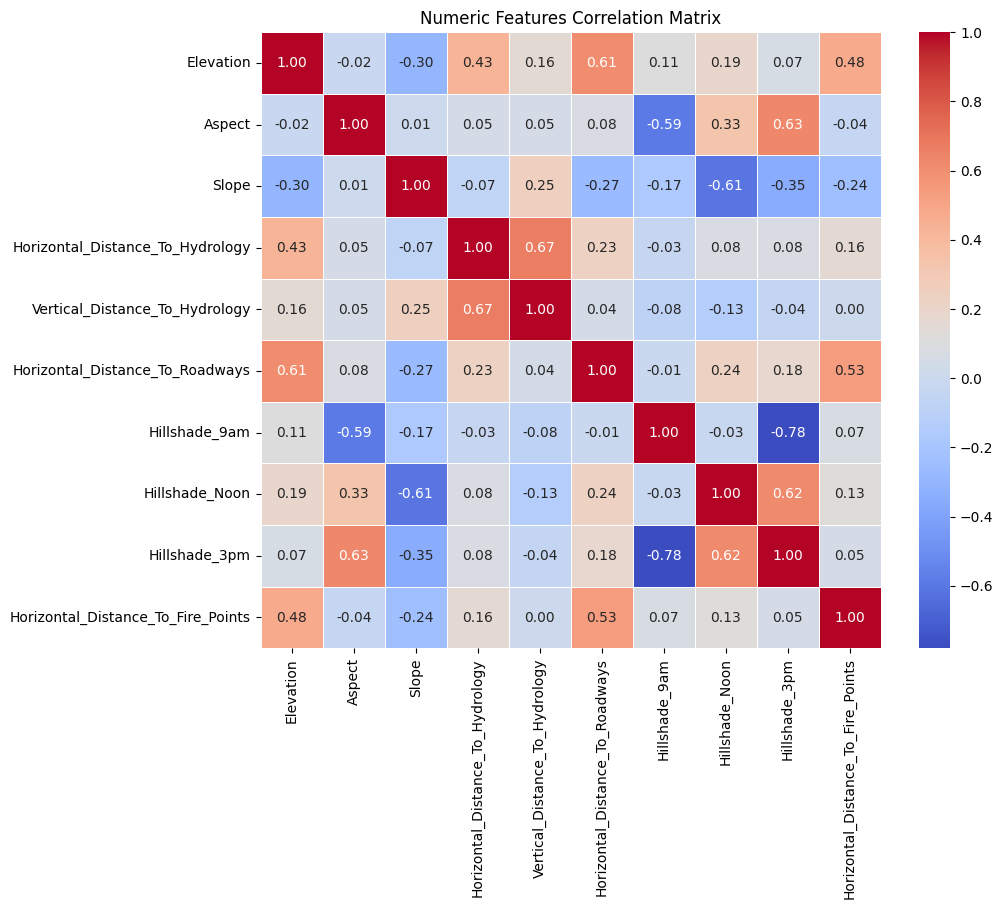

In [ ]:
numeric_cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

# Create a DataFrame with only numeric features
data = train_data[numeric_cols]

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Numeric Features Correlation Matrix")
plt.show()

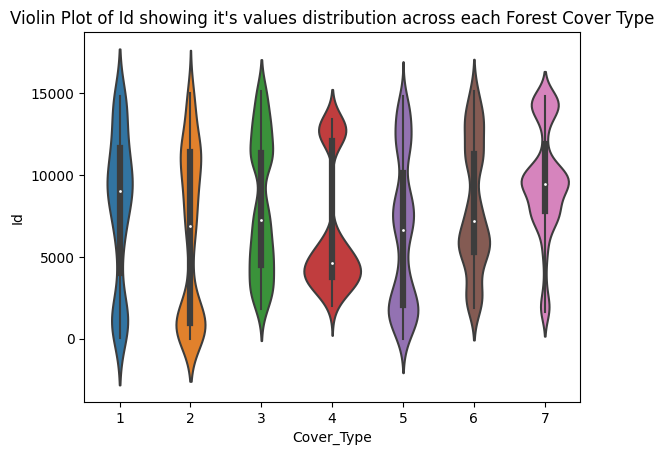

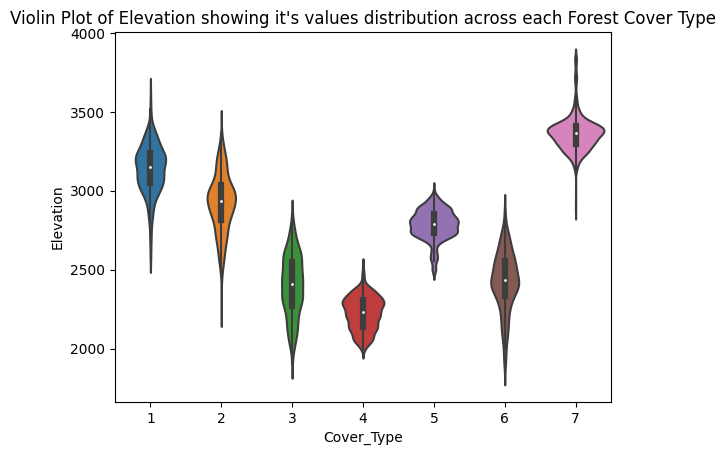

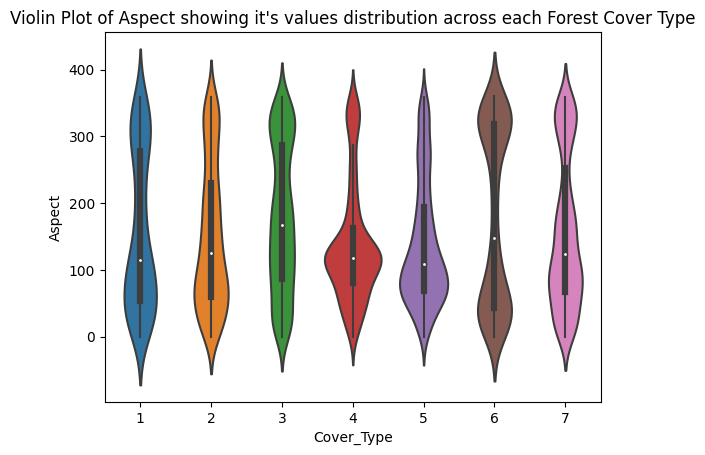

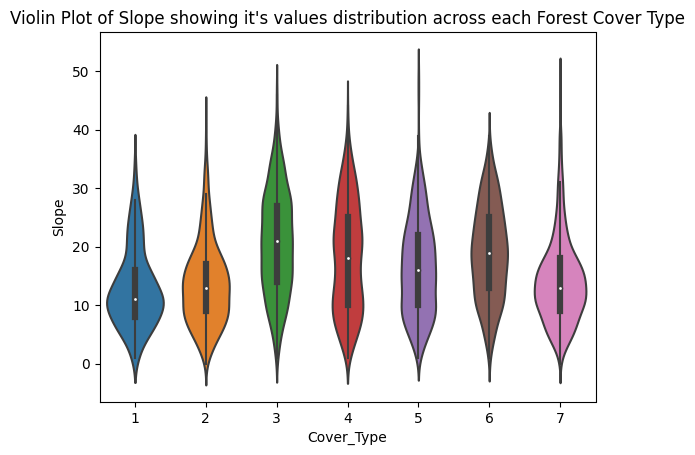

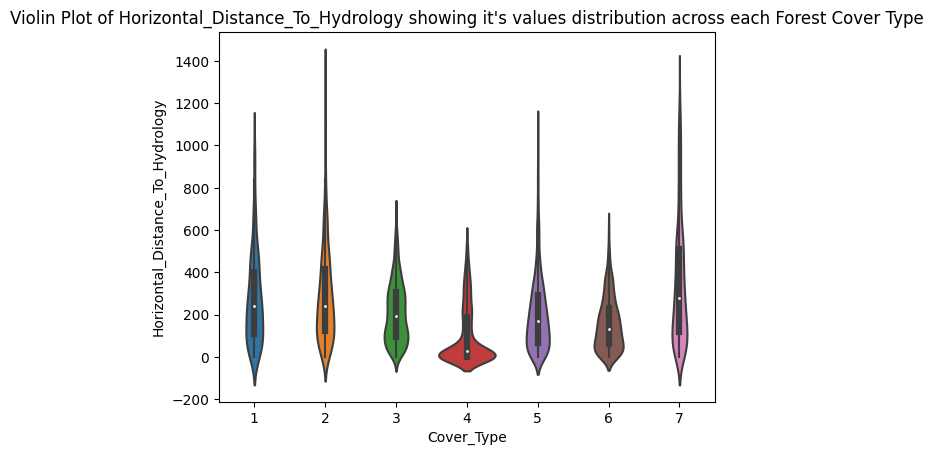

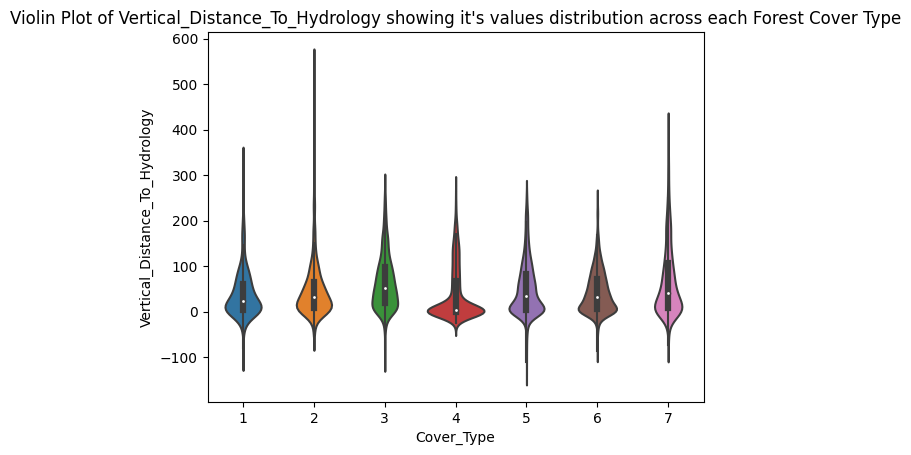

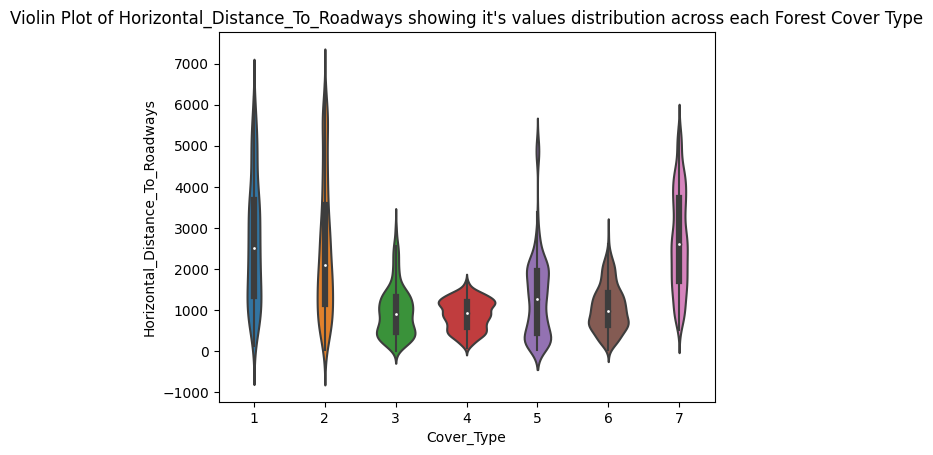

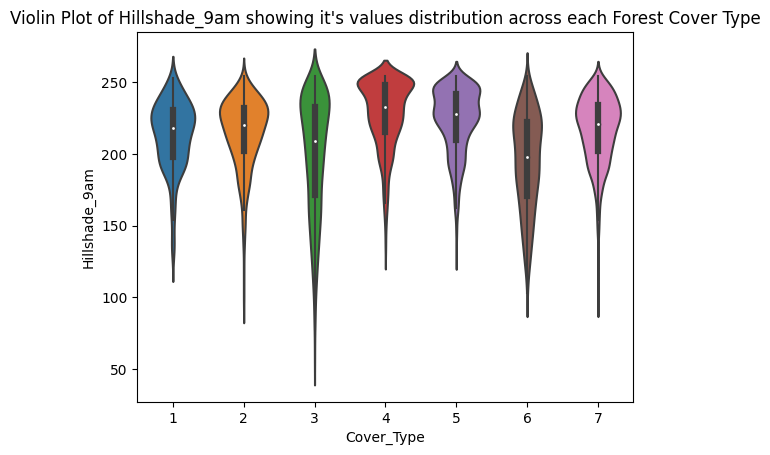

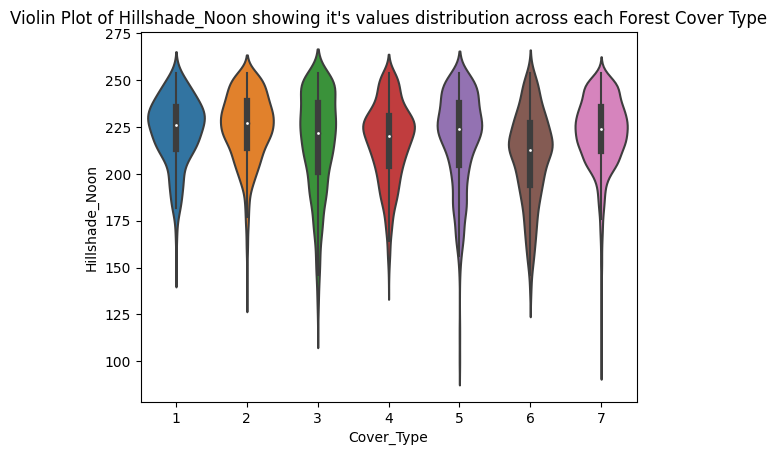

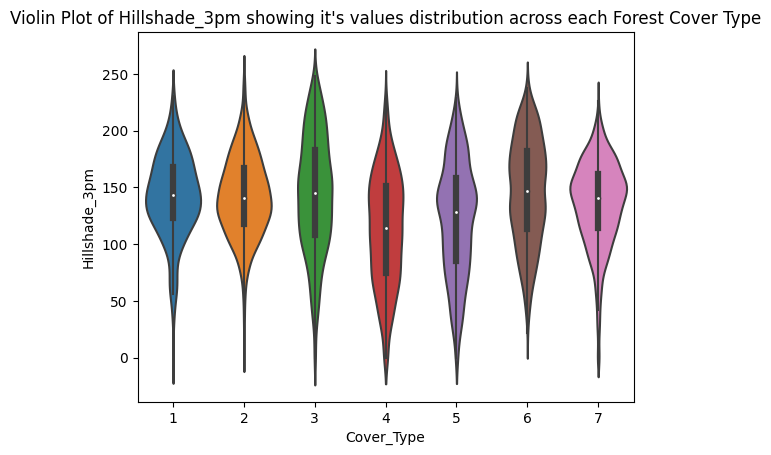

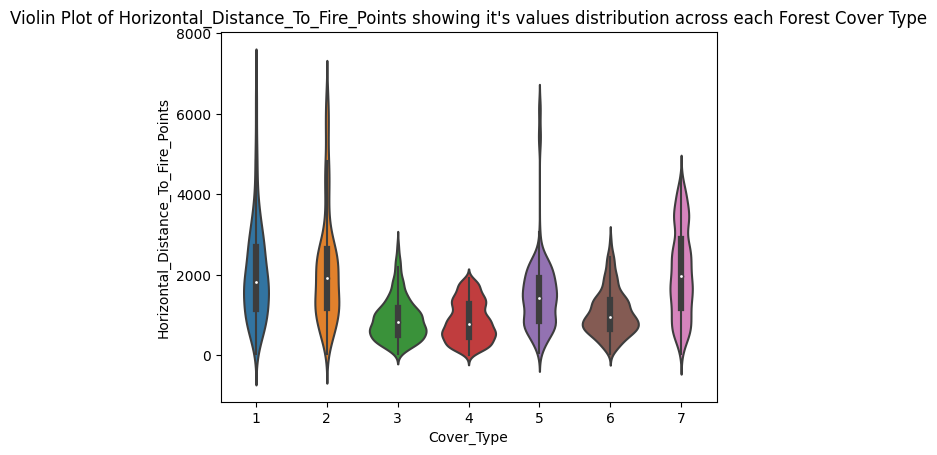

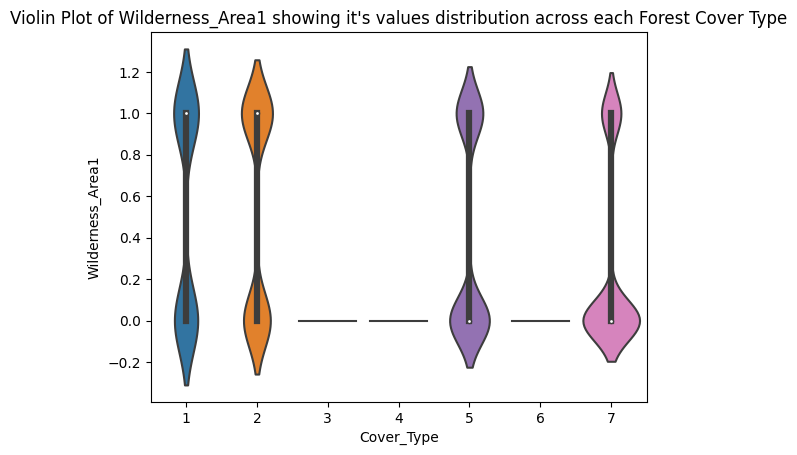

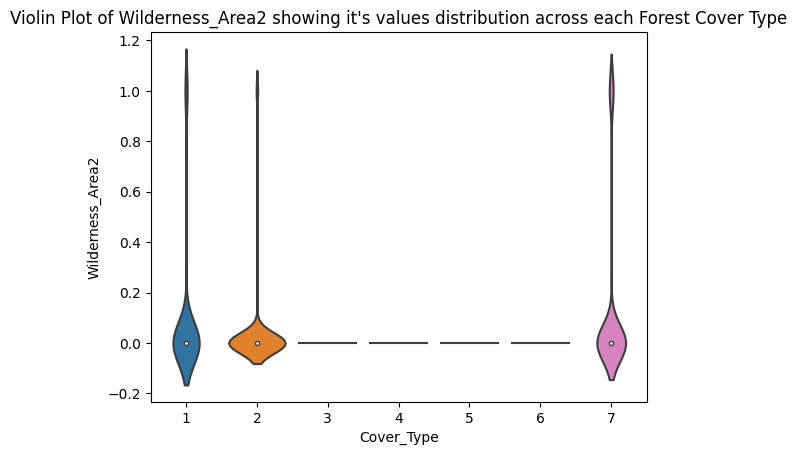

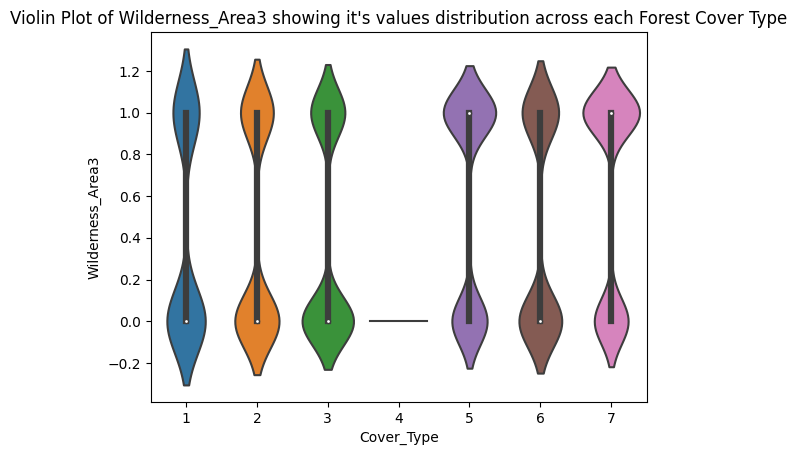

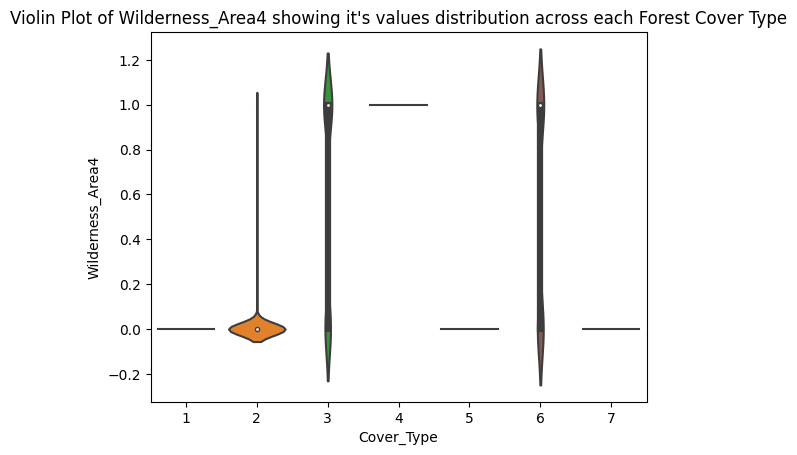

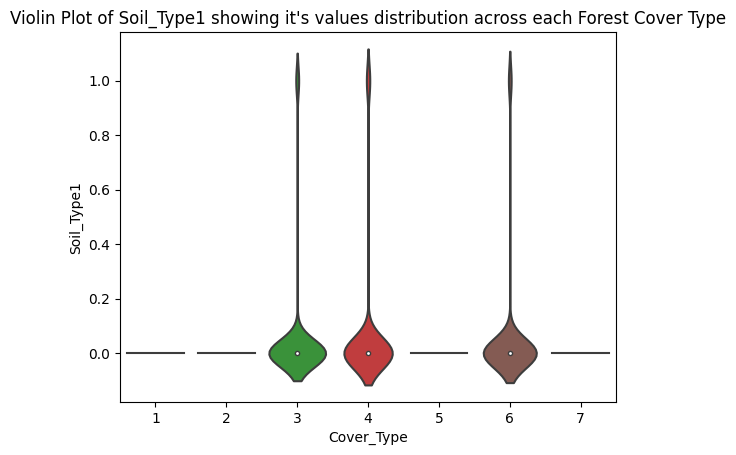

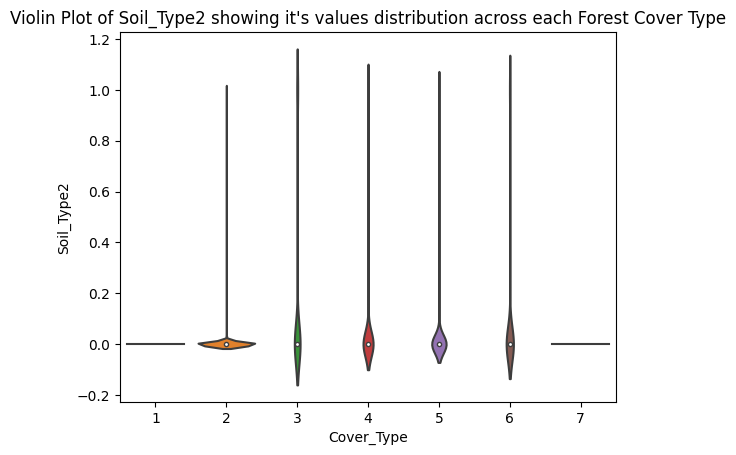

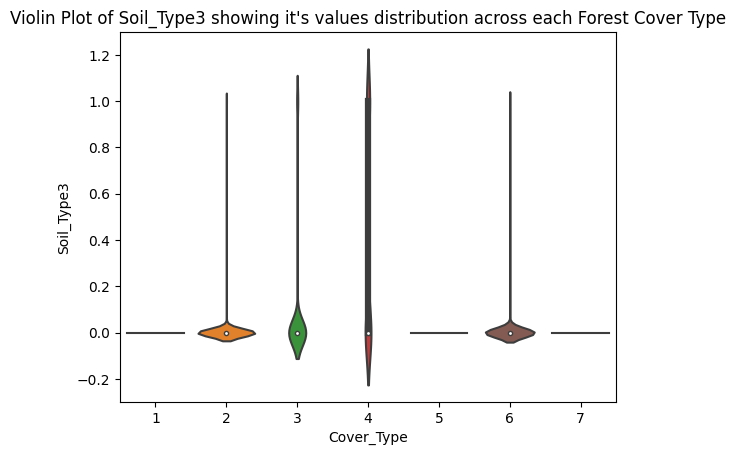

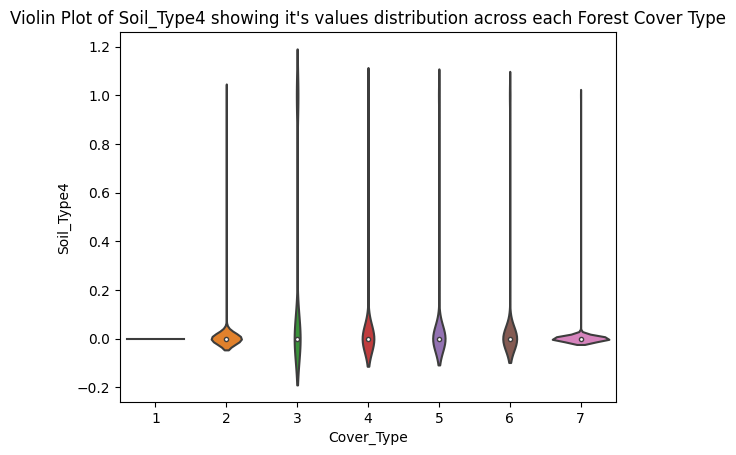

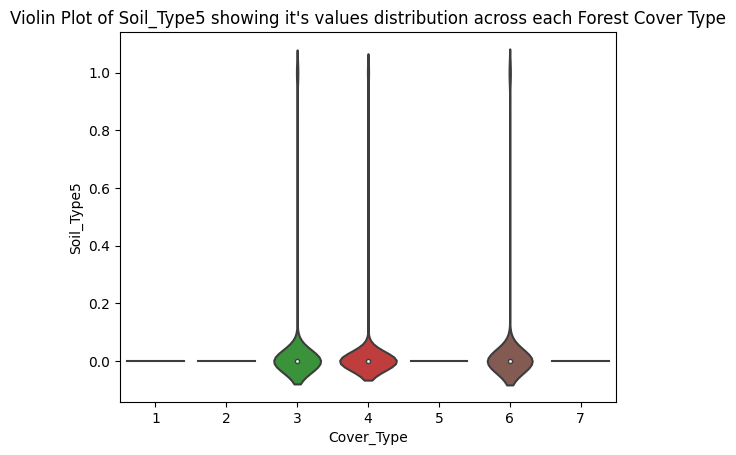

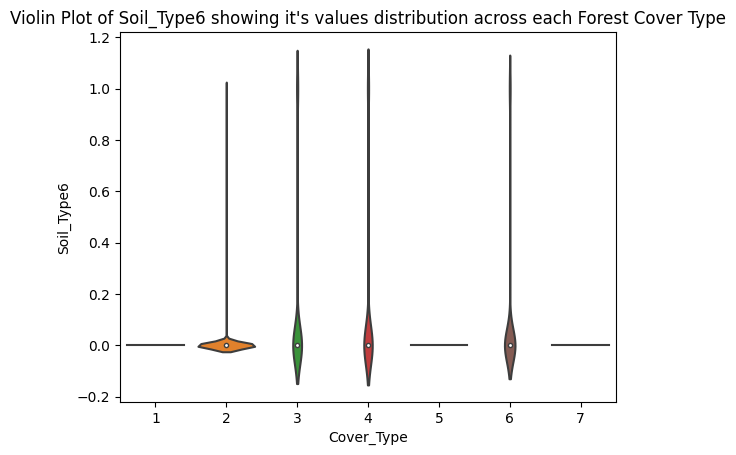

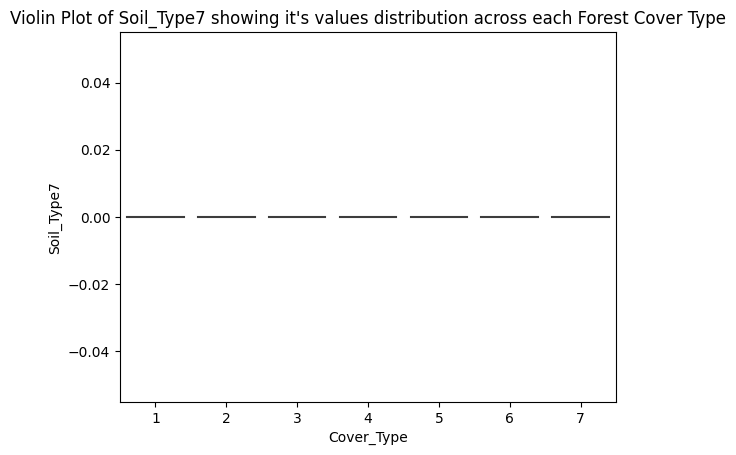

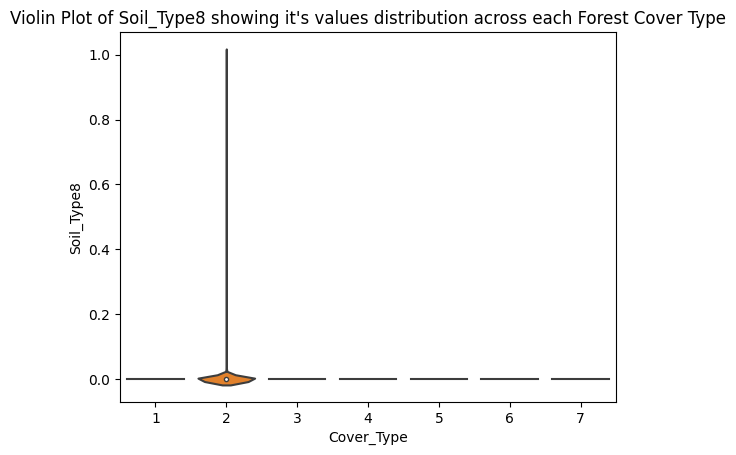

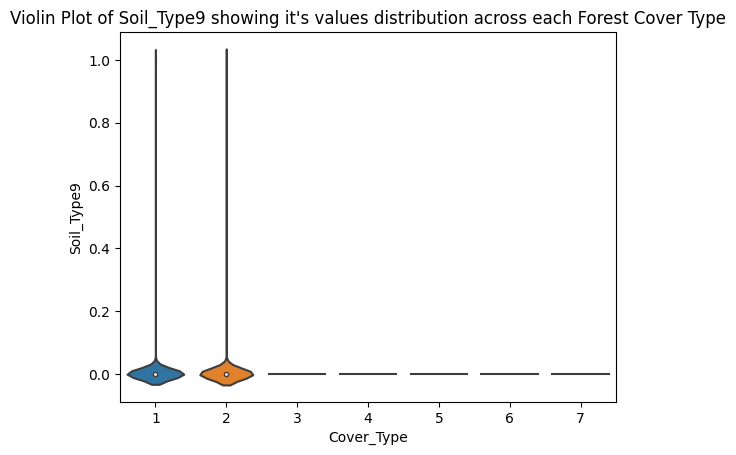

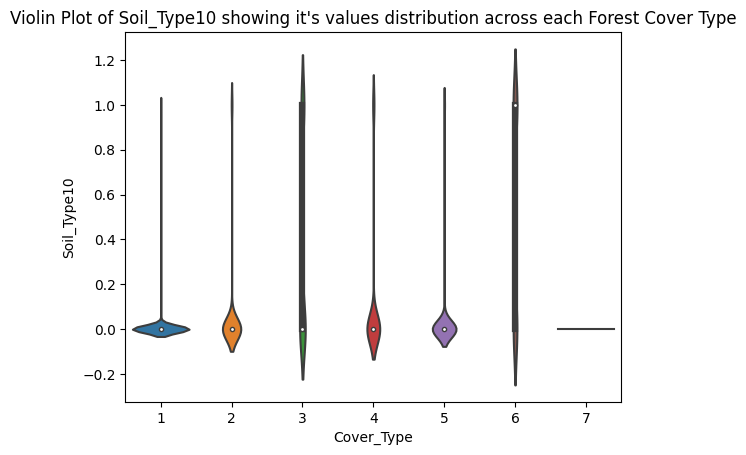

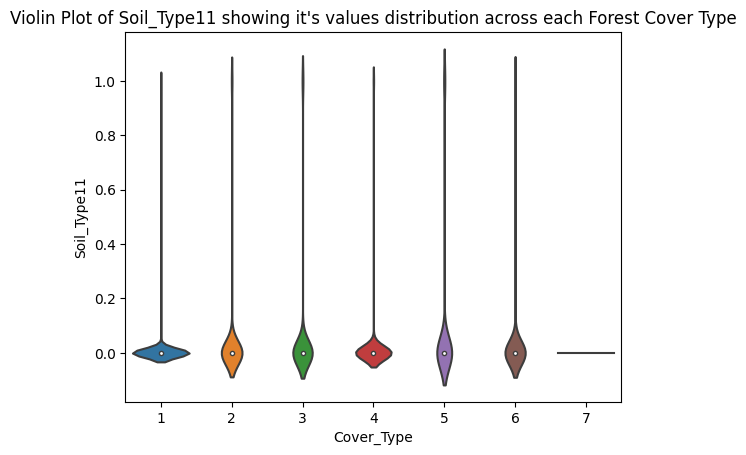

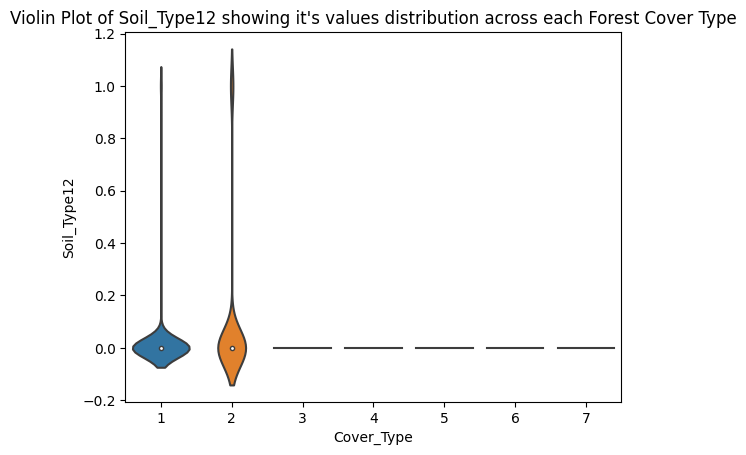

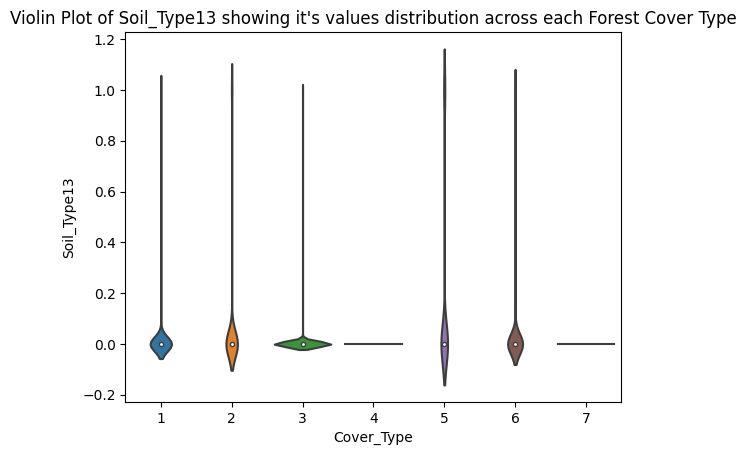

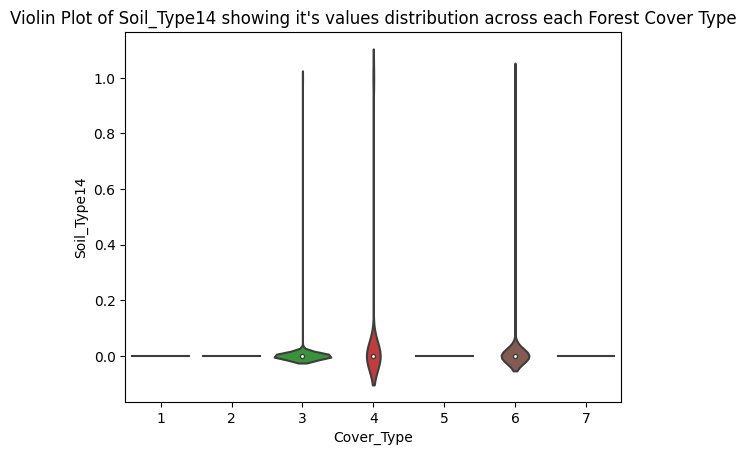

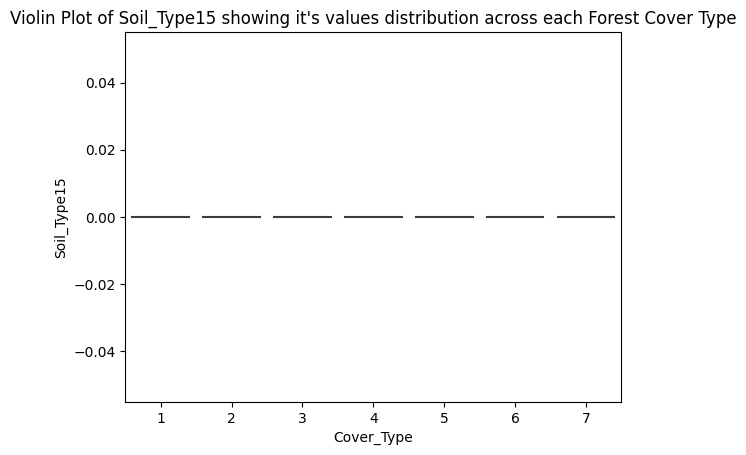

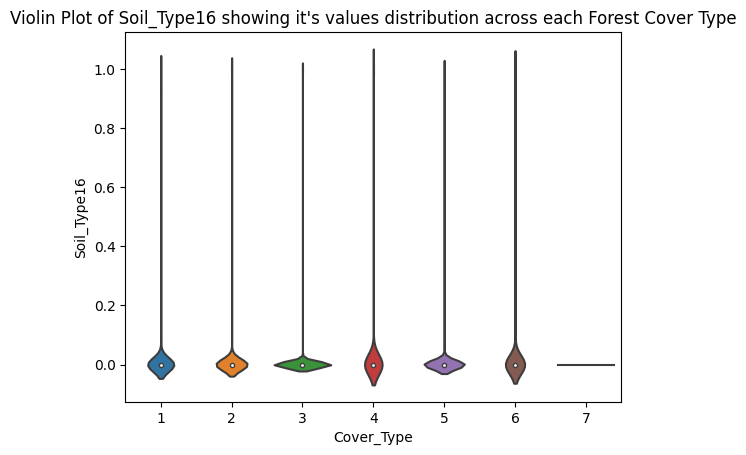

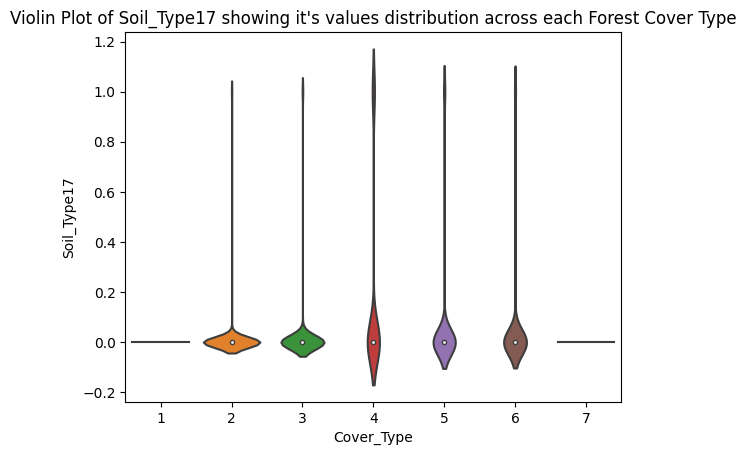

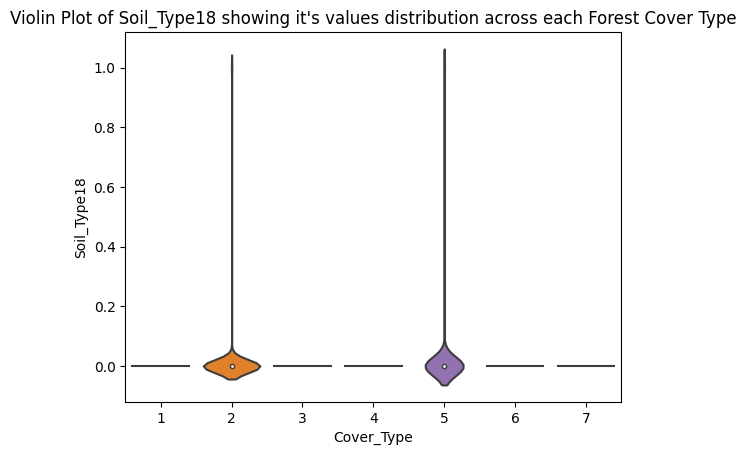

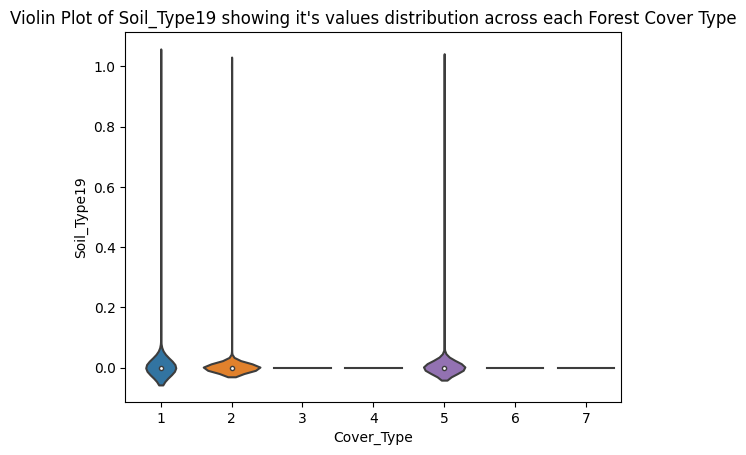

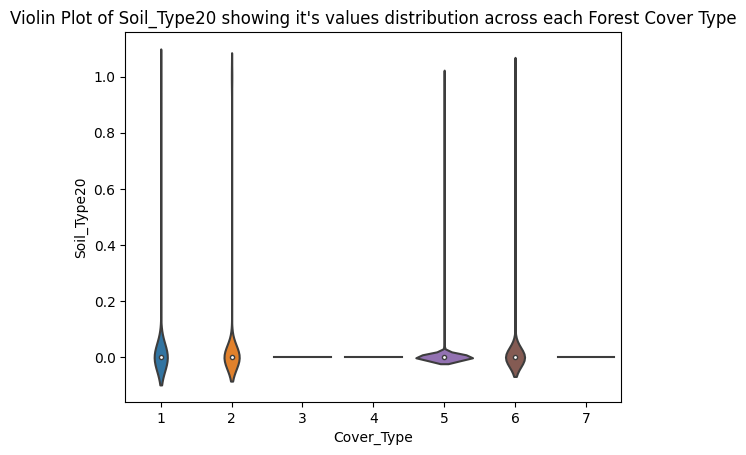

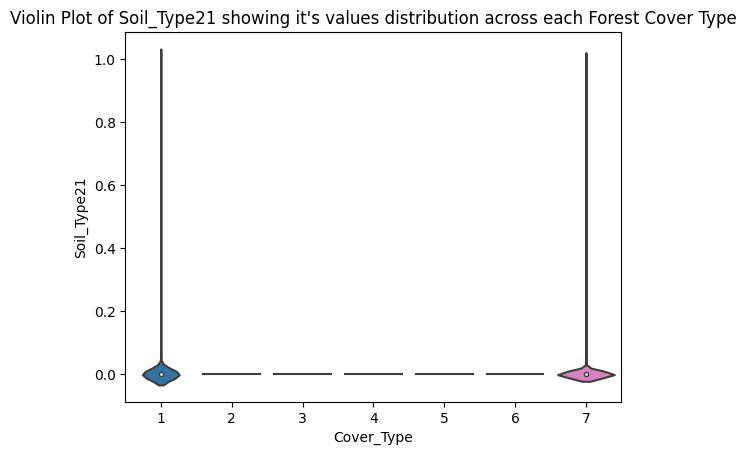

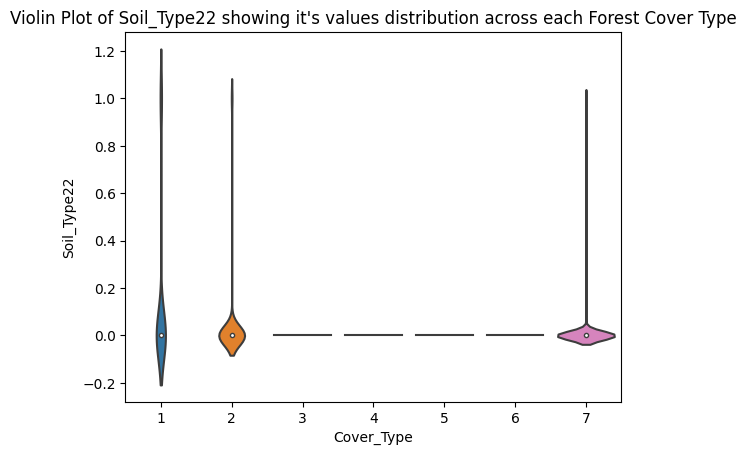

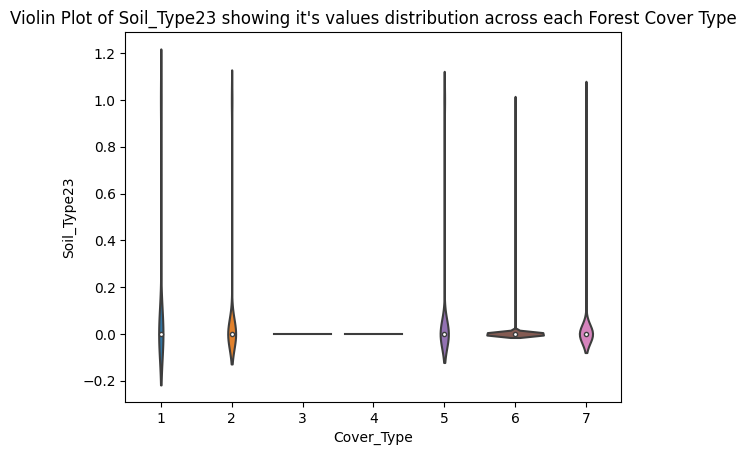

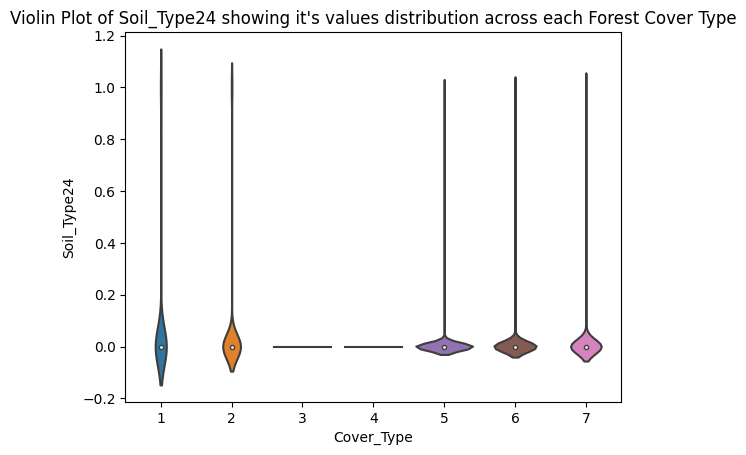

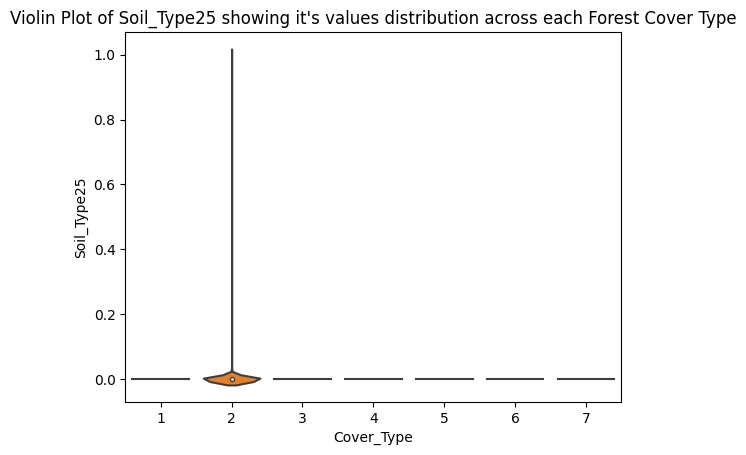

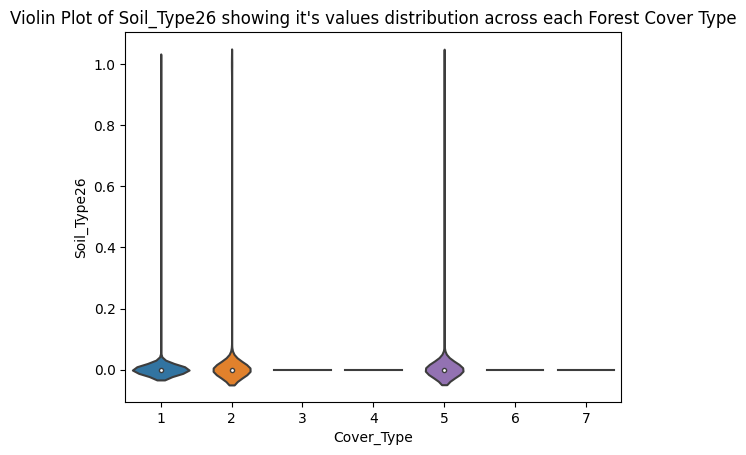

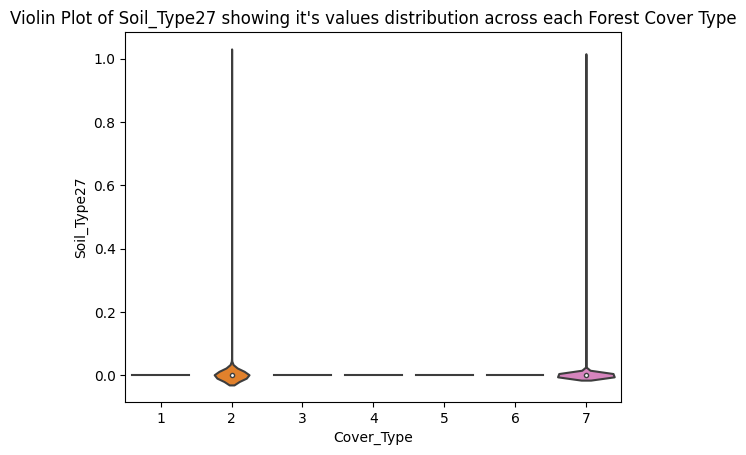

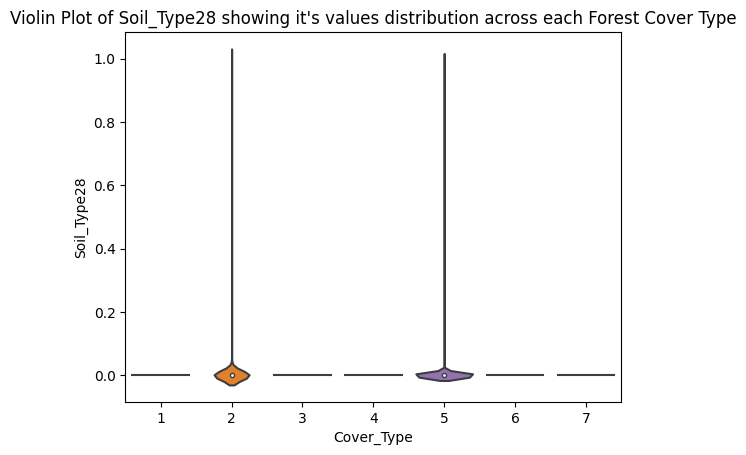

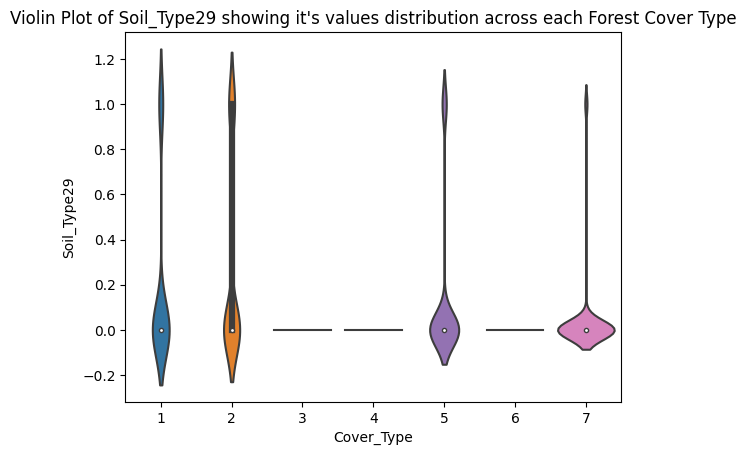

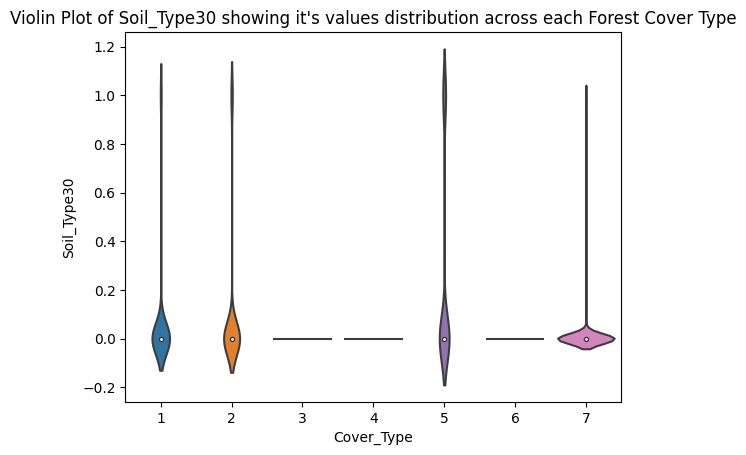

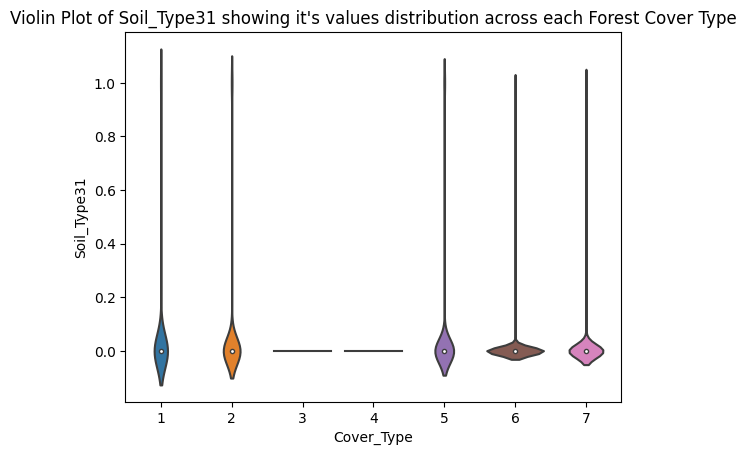

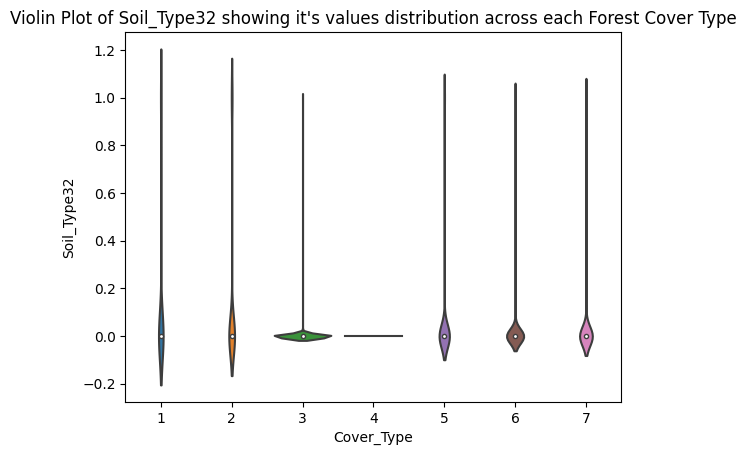

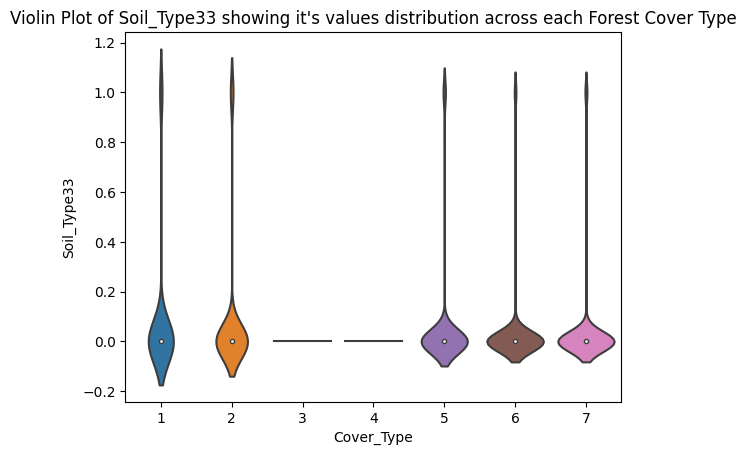

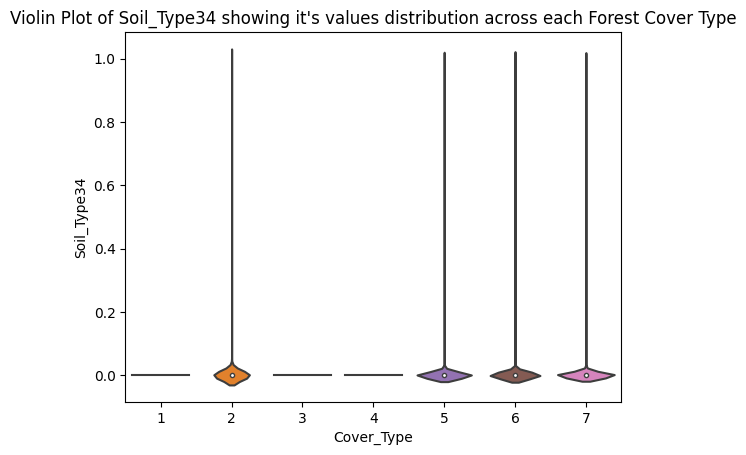

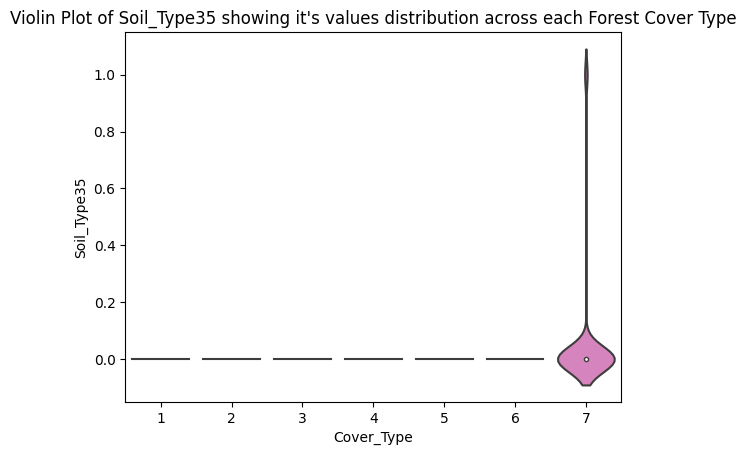

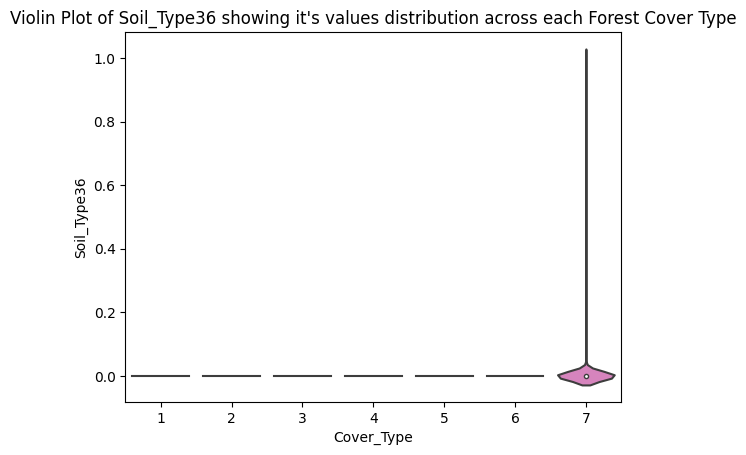

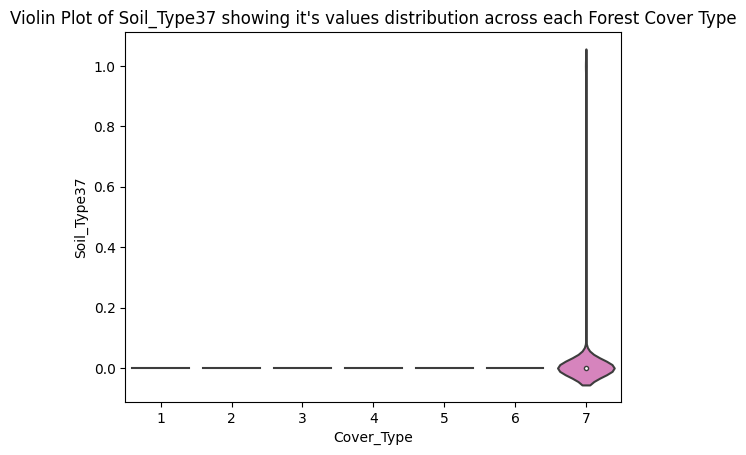

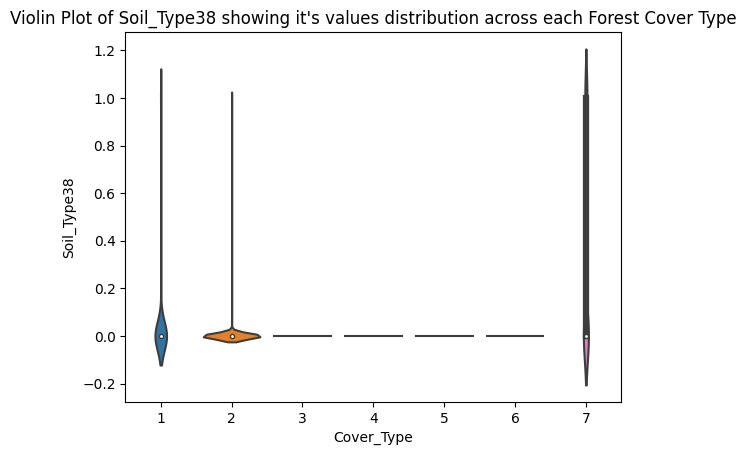

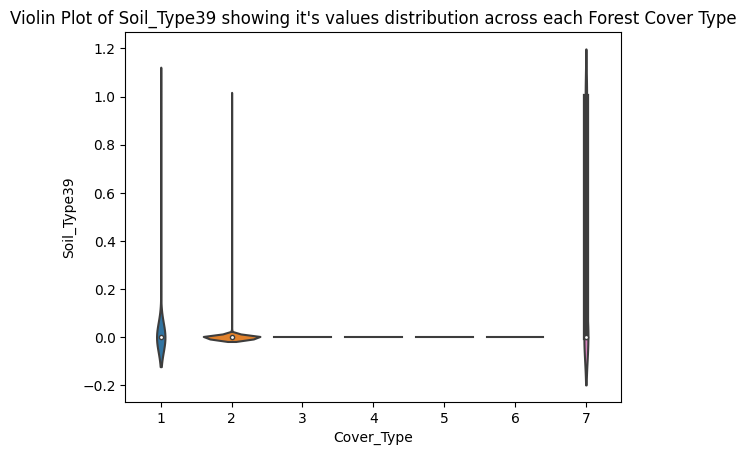

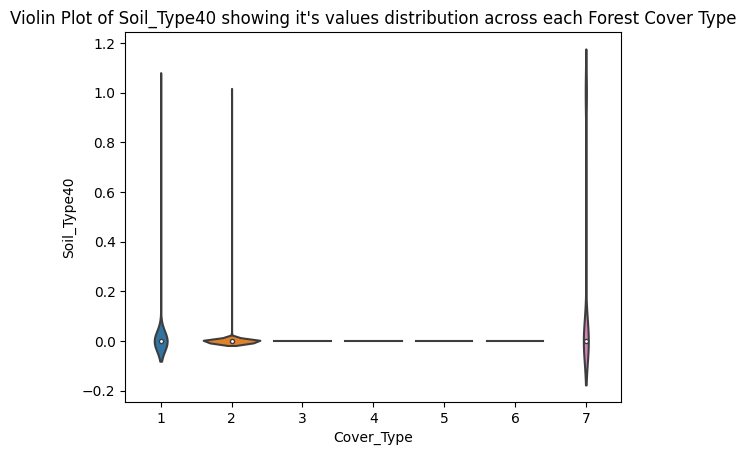

In [13]:
cols = train_data.columns

#number of attributes (exclude target)
size = len(cols)-1

#x-axis has target attribute to distinguish between classes
x = cols[size]

#y-axis shows values of an attribute
y = cols[0:size]

#Plot violin for all attributes
for i in range(0,size):
    sns.violinplot(data=train_data,x=x,y=y[i])  
    plt.title(f"Violin Plot of {y[i]} showing it's values distribution across each Forest Cover Type") 
    plt.show()


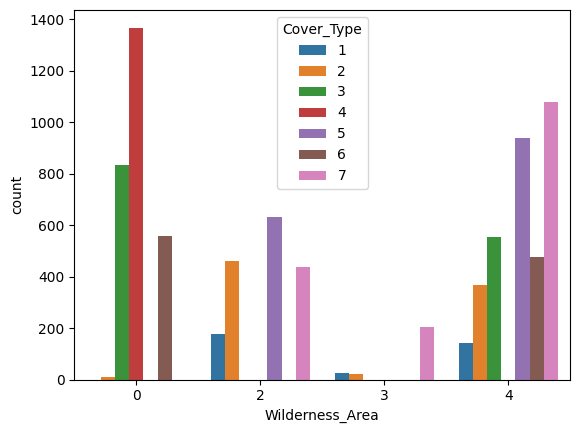

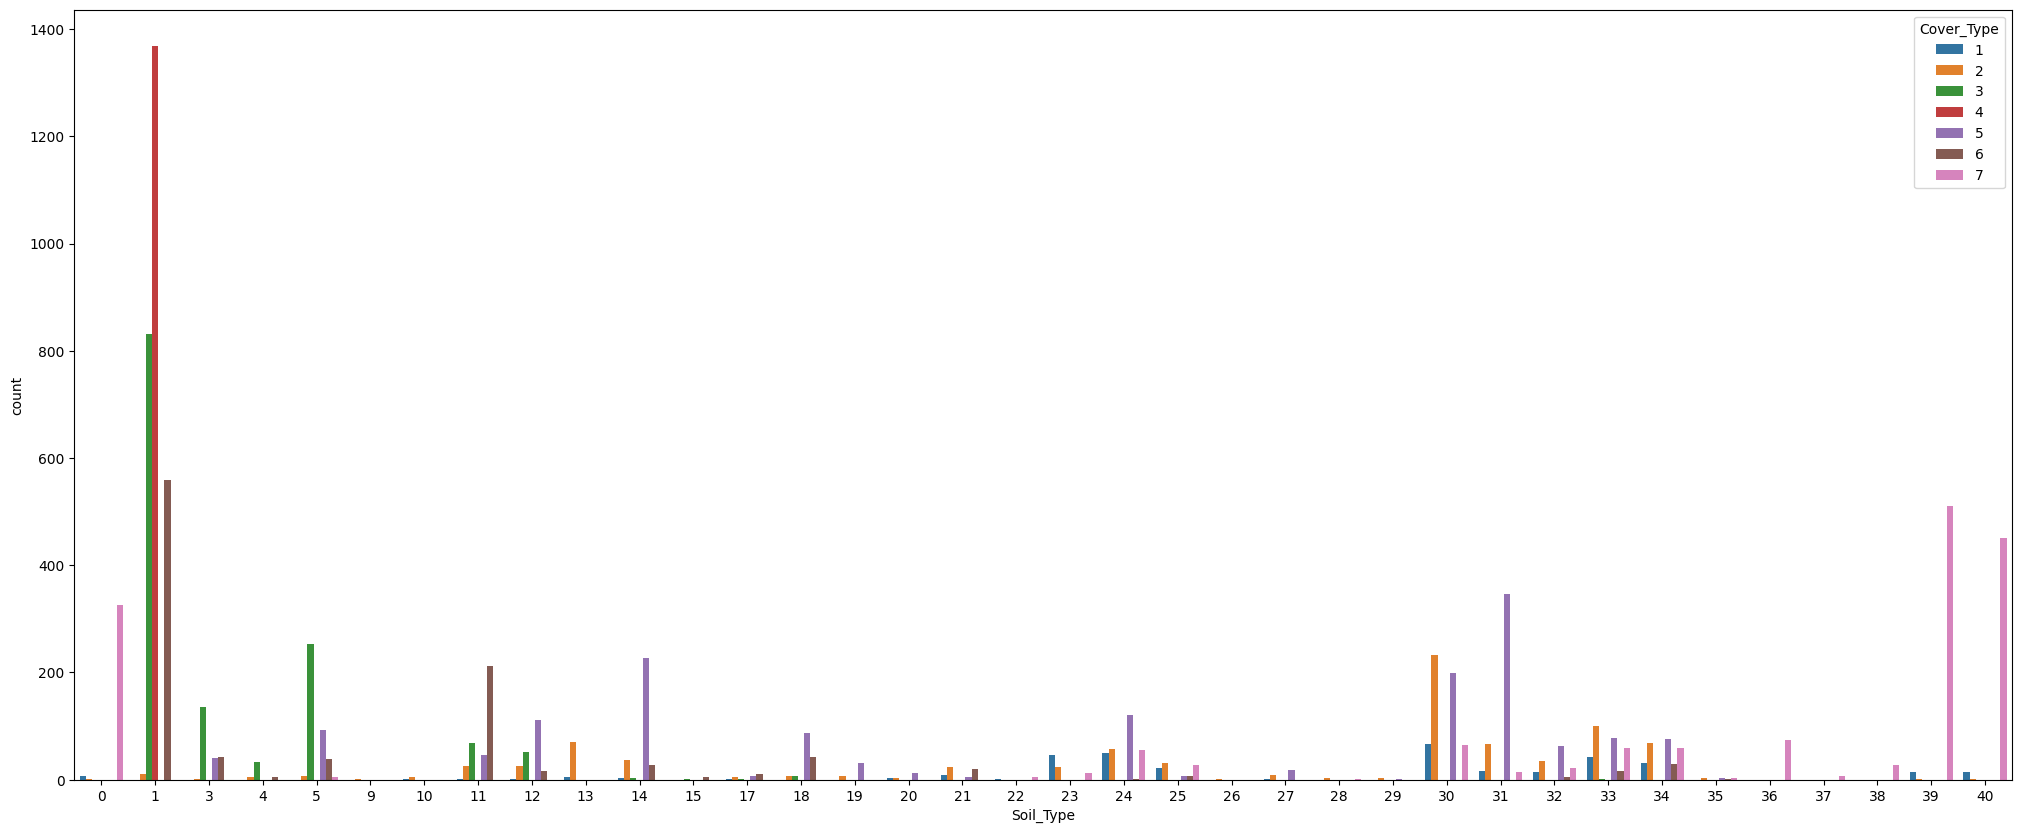

In [14]:
r,c = train_data.shape

#Create a new dataframe with r rows, one column for each encoded category, and target in the end
data = pd.DataFrame(index=np.arange(0, r),columns=['Wilderness_Area','Soil_Type','Cover_Type'])

#Make an entry in 'data' for each r as category_id, target value
for i in range(0,r):
    w=0;
    s=0;
    # Category1 range
    for j in range(10,14):
        if (train_data.iloc[i,j] == 1):
            w=j-9  #category class
            break
    # Category2 range        
    for k in range(14,54):
        if (train_data.iloc[i,k] == 1):
            s=k-13 #category class
            break
    #Make an entry in 'data' for each r as category_id, target value        
    data.iloc[i]=[w,s,train_data.iloc[i,c-1]]

#Plot for Category1    
sns.countplot(x="Wilderness_Area", hue="Cover_Type", data=data)
plt.show()
#Plot for Category2
plt.rc("figure", figsize=(25, 10))
sns.countplot(x="Soil_Type", hue="Cover_Type", data=data)
plt.show()

In [19]:
test_data = pd.read_csv('test_dataset.csv')


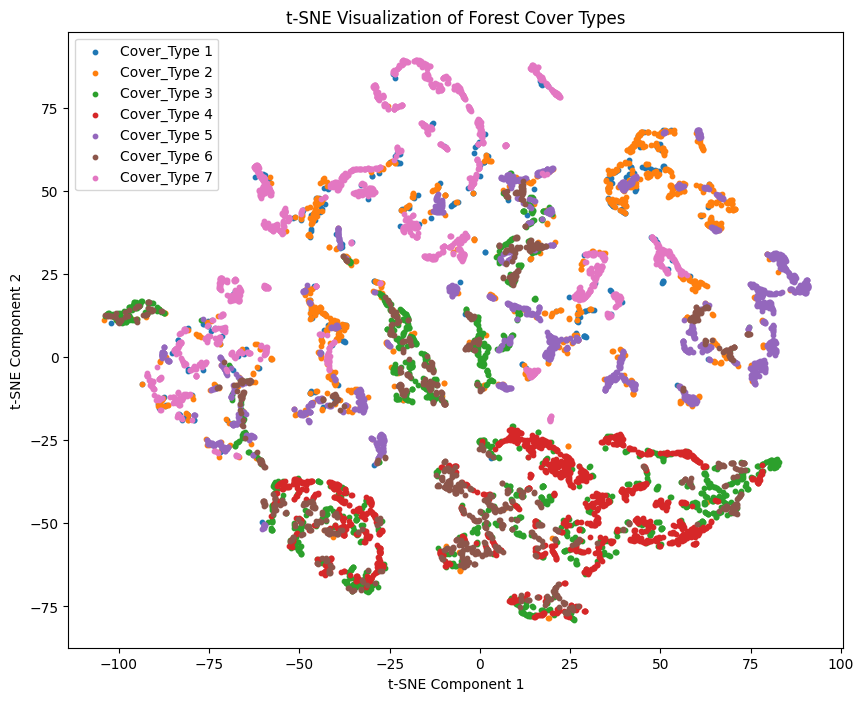

In [17]:
# Separate the features from the target variable
X = train_data.drop(columns=['Cover_Type'])
y = train_data['Cover_Type']

# Perform t-SNE with 2 components (you can change it to 3 for 3D visualization)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a scatter plot for the t-SNE visualization
plt.figure(figsize=(10, 8))
for i in range(1, 8):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], label=f'Cover_Type {i}', s=10)
plt.title("Train Data t-SNE Visualization of Forest Cover Types")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.show()



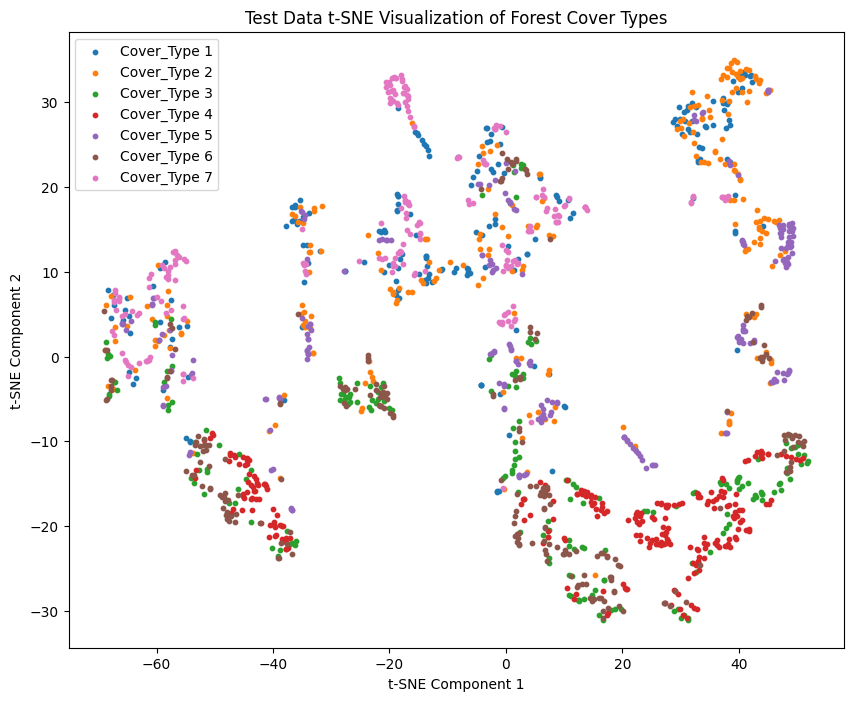

In [20]:
# Separate the features from the target variable
X = test_data.drop(columns=['Cover_Type'])
y = test_data['Cover_Type']

# Perform t-SNE with 2 components (you can change it to 3 for 3D visualization)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a scatter plot for the t-SNE visualization
plt.figure(figsize=(10, 8))
for i in range(1, 8):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], label=f'Cover_Type {i}', s=10)
plt.title("Test Data t-SNE Visualization of Forest Cover Types")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.show()

# Loading Data

In [372]:
train_data = pd.read_csv('training_dataset.csv')
train_data.drop(columns=['Id'],inplace=True)
test_data = pd.read_csv('test_dataset.csv')
test_data.drop(columns=['Id'],inplace=True)
val_data = pd.read_csv('validation_dataset.csv')
val_data.drop(columns=['Id'],inplace=True)
x_train = train_data.drop(columns=['Cover_Type']).values
y_train = train_data['Cover_Type'].values
x_val= val_data.drop(columns=['Cover_Type']).values
y_val = val_data['Cover_Type'].values
x_test = test_data.drop(columns=['Cover_Type']).values
y_test = test_data['Cover_Type'].values

In [373]:
print(train_data.shape)
print(test_data.shape)
print(val_data.shape)

(8286, 55)
(1525, 55)
(1498, 55)


# Question 1

Accuracy of knn is :  0.7383606557377049


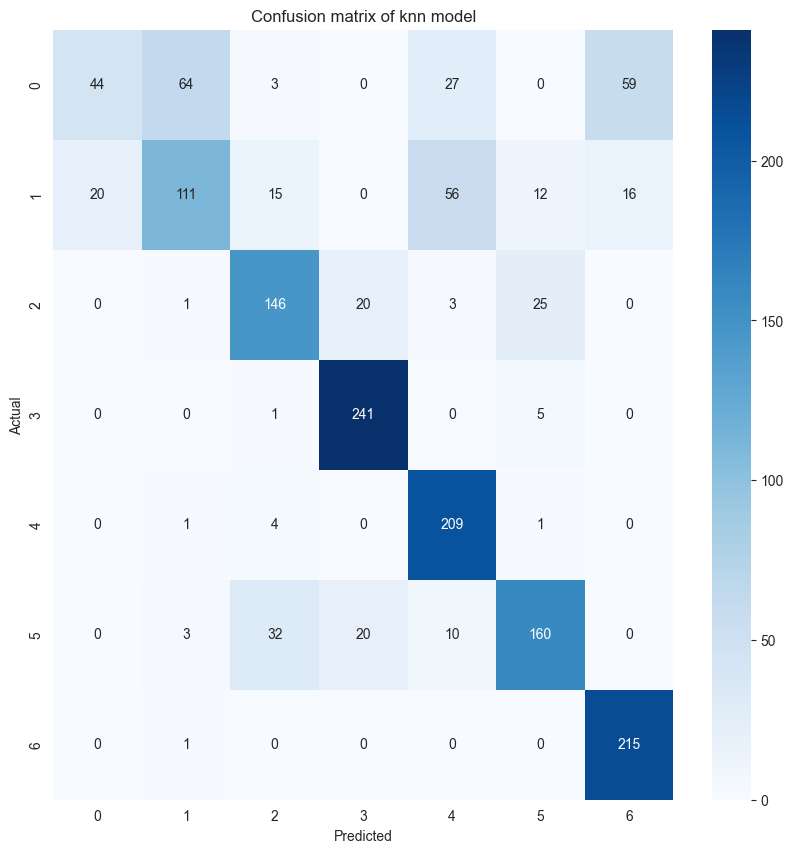

Accuracy of logreg is :  0.4740983606557377


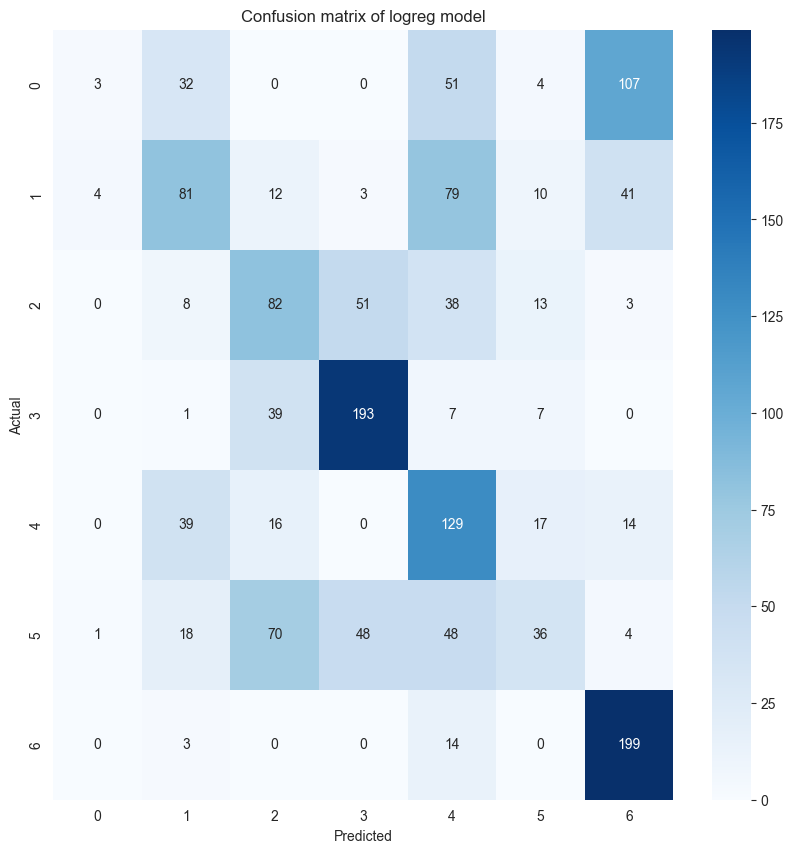

Accuracy of svm is :  0.5613114754098361


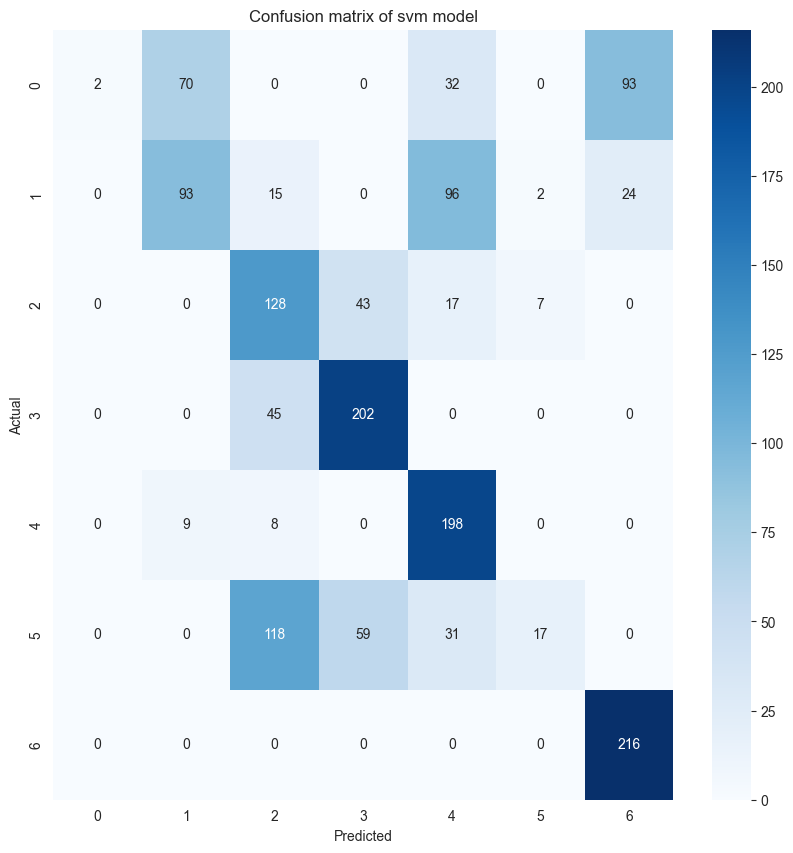

Accuracy of dt is :  0.7626229508196721


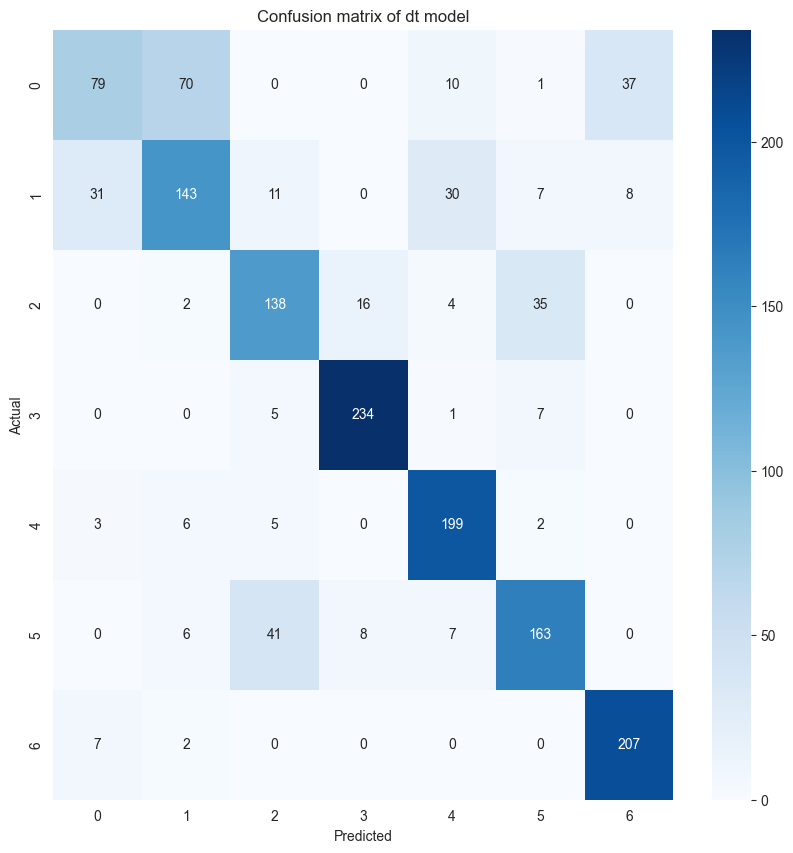

Accuracy of nb is :  0.6013114754098361


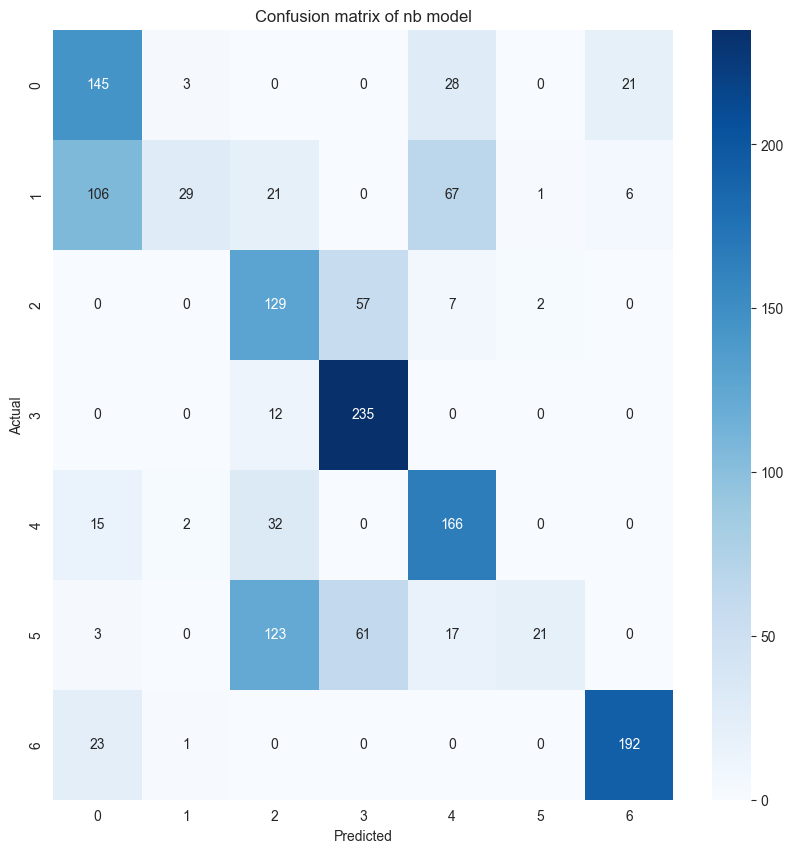

In [433]:
knn= KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
logreg = LogisticRegression(n_jobs=-1)
svm = SVC()
dt = DecisionTreeClassifier()
nb = GaussianNB()
model_names = ['knn','logreg','svm','dt','nb']
models = {'knn': {'model':knn,'result':0.0},
                  'logreg': {'model':logreg,'result':0.0},
                  'svm': {'model':svm,'result':0.0},
                  'dt': {'model':dt,'result':0.0},
                  'nb': {'model':nb,'result':0.0}}
for model in model_names :
    models[model]['model'].fit(x_train,y_train)
    y_pred= models[model]['model'].predict(x_test)
    models[model]['result']=accuracy_score(y_test,y_pred)
    print('Accuracy of '+model+' is : ',models[model]['result'])
    cm=confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(10,10))
    sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion matrix of {model} model')
    plt.show()

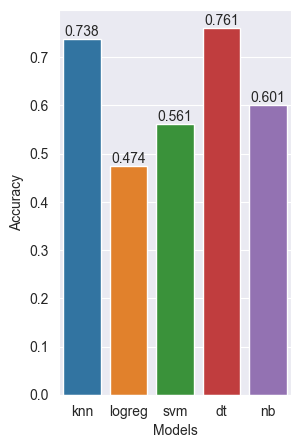

In [429]:
results = [models[model]['result'] for model in models.keys()]
plt.figure(figsize=(3,5))
sns.barplot(x=model_names,y=results)
plt.xlabel('Models')
plt.ylabel('Accuracy')
for i,value in enumerate(results):
    plt.text(i,value,f"{value:.3f}",ha='center',va='bottom')
plt.show()

In [377]:
dt_test_result = models['dt']['result']
knn_test_result = models['knn']['result']

## Conclusion

<p style='font-size:24px'>Baseline models are <span style='color:#865a5b'>Decision Tree</span> , <span style='color:#638296'>KNN</span></p>

# Question 2

## Filer method

In [378]:
range_k = range(1,len(train_data.columns))
dt_train_result_flt = []
knn_train_result_flt = []
dt_test_result_flt = []
knn_test_result_flt = []

for k in range_k:
    selector = SelectKBest(mutual_info_classif, k=k)
    selector.fit(x_train, y_train)
    x_train_new = selector.transform(x_train)
    x_test_new = selector.transform(x_test)
    knn.fit(x_train_new,y_train)
    dt.fit(x_train_new,y_train)
    y_pred_test_knn= knn.predict(x_test_new)
    y_pred_test_dt= dt.predict(x_test_new)
    y_pred_train_knn= knn.predict(x_train_new)
    y_pred_train_dt= dt.predict(x_train_new)
    knn_test_result_flt.append(accuracy_score(y_test,y_pred_test_knn))
    dt_test_result_flt.append(accuracy_score(y_test,y_pred_test_dt))
    knn_train_result_flt.append(accuracy_score(y_train,y_pred_train_knn))
    dt_train_result_flt.append(accuracy_score(y_train,y_pred_train_dt))

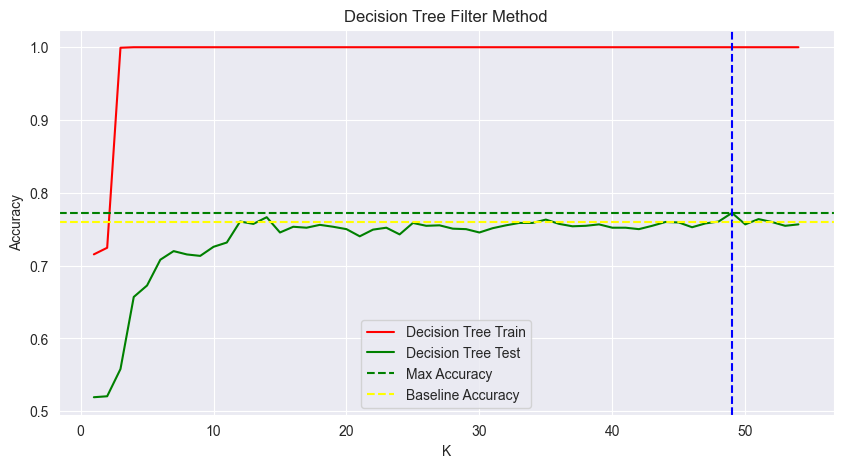

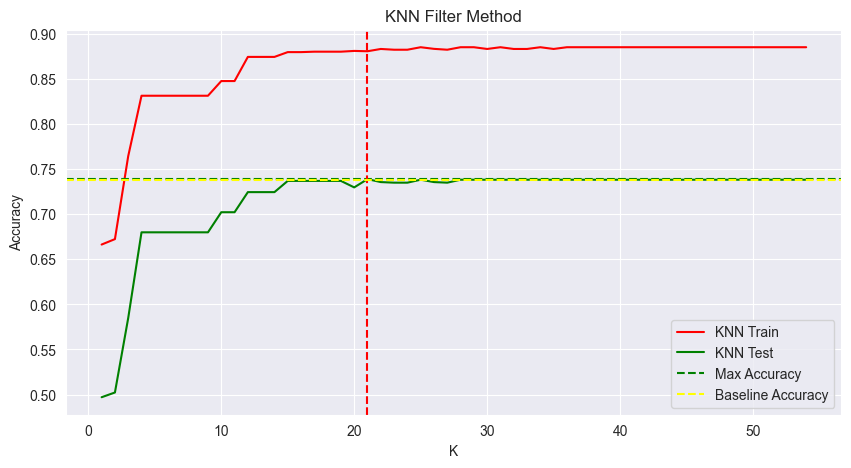

In [434]:
plt.figure(figsize=(10,5))
plt.plot(range_k,dt_train_result_flt,color='red',label='Decision Tree Train')
plt.plot(range_k,dt_test_result_flt,color='green',label='Decision Tree Test')
plt.axhline(y=max(dt_test_result_flt), color='green', linestyle='--',label='Max Accuracy')
plt.axvline(x=range_k[np.argmax(dt_test_result_flt)], color='blue', linestyle='--')
plt.axhline(y=dt_test_result, color='yellow', linestyle='--',label='Baseline Accuracy')
plt.title('Decision Tree Filter Method')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.figure(figsize=(10,5))
plt.plot(range_k,knn_train_result_flt,color='red',label='KNN Train')
plt.plot(range_k,knn_test_result_flt,color='green',label='KNN Test')
plt.axhline(y=max(knn_test_result_flt), color='green', linestyle='--',label='Max Accuracy')
plt.axvline(x=range_k[np.argmax(knn_test_result_flt)], color='red', linestyle='--')
plt.axhline(y=knn_test_result, color='yellow', linestyle='--',label='Baseline Accuracy')
plt.title('KNN Filter Method')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [381]:
print('Best K for Decision Tree is : ',range_k[np.argmax(dt_test_result_flt)],'with accuracy of : ',np.max(dt_test_result_flt))
print('Best K for KNN is : ',range_k[np.argmax(knn_test_result_flt)],'with accuracy of : ',np.max(knn_test_result_flt))

Best K for Decision Tree is :  49 with accuracy of :  0.7724590163934426
Best K for KNN is :  21 with accuracy of :  0.7390163934426229


## Wrapper method

In [382]:
range_k = range(1,len(train_data.columns))
dt_train_result_wrp = []
knn_train_result_wrp = []
dt_test_result_wrp = []
knn_test_result_wrp = []
selected_features_knn_wrp = [()]
selected_features_dt_wrp = [()]
for k in range_k:
    knn_selector = SequentialFeatureSelector(knn, k_features=k,fixed_features=selected_features_knn_wrp[-1], forward=True, verbose=0,n_jobs=-1, scoring='accuracy', cv=5)
    dt_selector = SequentialFeatureSelector(dt, k_features=k,fixed_features=selected_features_dt_wrp[-1], forward=True, verbose=0,n_jobs=-1, scoring='accuracy', cv=5)
    knn_selector.fit(x_train, y_train)
    dt_selector.fit(x_train, y_train)
    selected_features_knn_wrp.append(knn_selector.k_feature_idx_)
    selected_features_dt_wrp.append(dt_selector.k_feature_idx_)
    x_train_new_knn = knn_selector.transform(x_train)
    x_test_new_knn = knn_selector.transform(x_test)
    x_train_new_dt = dt_selector.transform(x_train)
    x_test_new_dt = dt_selector.transform(x_test)
    knn.fit(x_train_new_knn,y_train)
    dt.fit(x_train_new_dt,y_train)
    y_pred_test_knn= knn.predict(x_test_new_knn)
    y_pred_test_dt= dt.predict(x_test_new_dt)
    y_pred_train_knn= knn.predict(x_train_new_knn)
    y_pred_train_dt= dt.predict(x_train_new_dt)
    knn_test_result_wrp.append(accuracy_score(y_test,y_pred_test_knn))
    dt_test_result_wrp.append(accuracy_score(y_test,y_pred_test_dt))
    knn_train_result_wrp.append(accuracy_score(y_train,y_pred_train_knn))
    dt_train_result_wrp.append(accuracy_score(y_train,y_pred_train_dt))

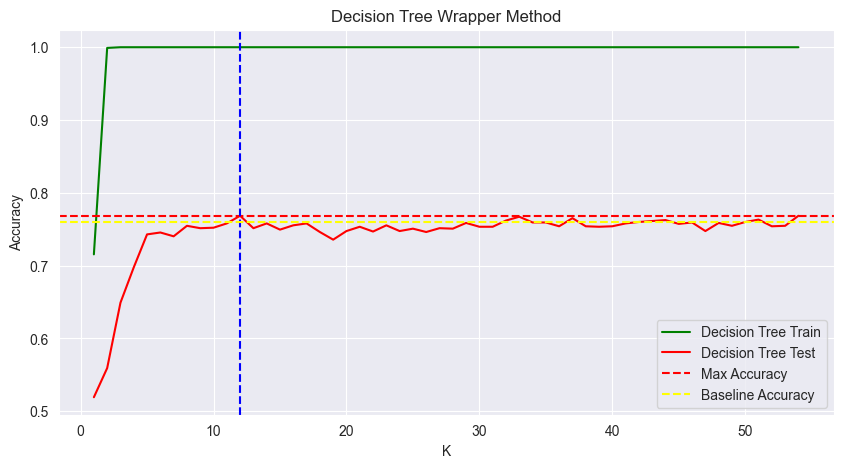

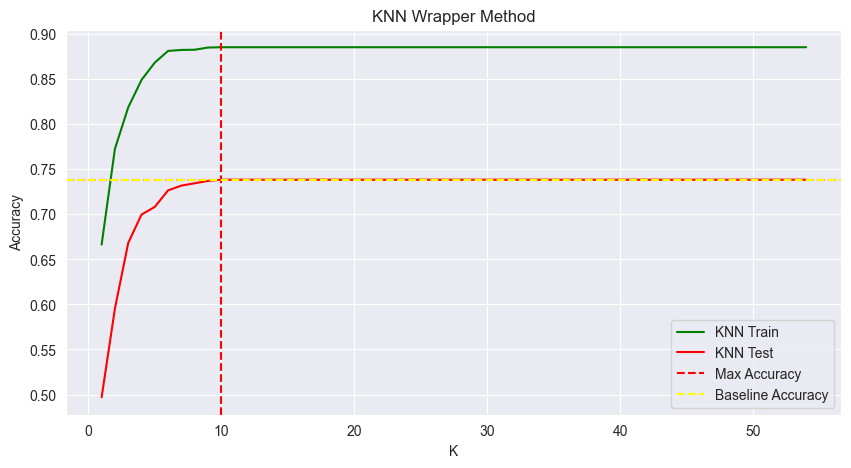

In [435]:
plt.figure(figsize=(10,5))
plt.plot(range_k,dt_train_result_wrp,color='green',label='Decision Tree Train')
plt.plot(range_k,dt_test_result_wrp,color='red',label='Decision Tree Test')
plt.axhline(y=max(dt_test_result_wrp), color='red', linestyle='--',label='Max Accuracy')
plt.axvline(x=range_k[np.argmax(dt_test_result_wrp)], color='blue', linestyle='--')
plt.axhline(y=dt_test_result, color='yellow', linestyle='--',label='Baseline Accuracy')
plt.title('Decision Tree Wrapper Method')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.figure(figsize=(10,5))
plt.plot(range_k,knn_train_result_wrp,color='green',label='KNN Train')
plt.plot(range_k,knn_test_result_wrp,color='red',label='KNN Test')
plt.axhline(y=max(knn_test_result_wrp), color='red', linestyle='--',label='Max Accuracy')
plt.axvline(x=range_k[np.argmax(knn_test_result_wrp)], color='red', linestyle='--')
plt.axhline(y=knn_test_result, color='yellow', linestyle='--',label='Baseline Accuracy')
plt.title('KNN Wrapper Method')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [385]:
print('Best K for Decision Tree is : ',range_k[np.argmax(dt_test_result_wrp)],'with accuracy of : ',np.max(dt_test_result_wrp))
print('Best K for KNN is : ',range_k[np.argmax(knn_test_result_wrp)],'with accuracy of : ',np.max(knn_test_result_wrp))

Best K for Decision Tree is :  12 with accuracy of :  0.7685245901639344
Best K for KNN is :  10 with accuracy of :  0.7383606557377049


## Comparison to baseline

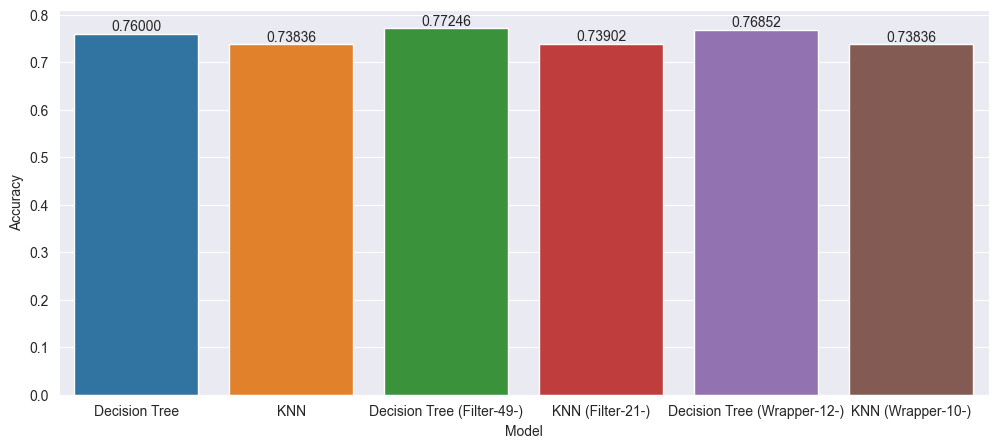

In [386]:
plt.figure(figsize=(12,5))
sns.barplot(x=['Decision Tree','KNN',f'Decision Tree (Filter-{range_k[np.argmax(dt_test_result_flt)]}-)',f'KNN (Filter-{range_k[np.argmax(knn_test_result_flt)]}-)',f'Decision Tree (Wrapper-{range_k[np.argmax(dt_test_result_wrp)]}-)',f'KNN (Wrapper-{range_k[np.argmax(knn_test_result_wrp)]}-)'],y=[np.max(dt_test_result),np.max(knn_test_result),np.max(dt_test_result_flt),np.max(knn_test_result_flt),np.max(dt_test_result_wrp),np.max(knn_test_result_wrp)])
plt.text(0,np.max(dt_test_result),f'{np.max(dt_test_result):.5f}',ha='center',va='bottom')
plt.text(1,np.max(knn_test_result),f'{np.max(knn_test_result):.5f}',ha='center',va='bottom')
plt.text(2,np.max(dt_test_result_flt),f'{np.max(dt_test_result_flt):.5f}',ha='center',va='bottom')
plt.text(3,np.max(knn_test_result_flt),f'{np.max(knn_test_result_flt):.5f}',ha='center',va='bottom')
plt.text(4,np.max(dt_test_result_wrp),f'{np.max(dt_test_result_wrp):.5f}',ha='center',va='bottom')
plt.text(5,np.max(knn_test_result_wrp),f'{np.max(knn_test_result_wrp):.5f}',ha='center',va='bottom')
plt.xlabel('Model')
## Conclusion
plt.ylabel('Accuracy')
plt.show()

## Conclusion

<p style='font-size:24px'>Baseline models are <span style='color:#6b946a'>Decision Tree with 49 features (Filter by mutual_info)</span> , <span style='color:#865a5b'>KNN with 21 feature (Filter by mutual_info)</span></p>

# Question 3 'Ensemble models'

## Bagging

### Decision Tree Bagging

In [387]:
flt_selector = SelectKBest(mutual_info_classif,k=49)
x_train_new_flt = flt_selector.fit_transform(x_train,y_train)
x_val_new_flt = flt_selector.transform(x_val)
x_test_new_flt = flt_selector.transform(x_test)

Accuracy of Decision Tree Bagging on test set :  0.7986885245901639
Accuracy of Decision Tree Bagging on train set :  0.9934829833454019


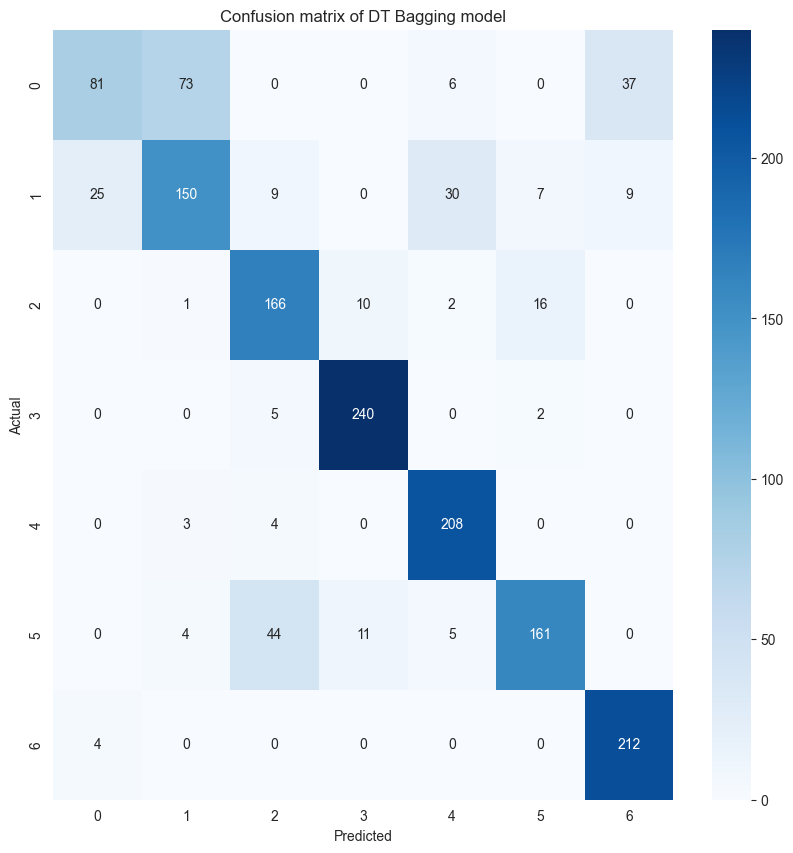

In [438]:
from sklearn.ensemble import BaggingClassifier
dt_bagging = BaggingClassifier(DecisionTreeClassifier(random_state=0),n_jobs=-1,random_state=0)
dt_bagging.fit(x_train_new_flt,y_train)
y_pred_test_dt_bagging = dt_bagging.predict(x_test_new_flt)
y_pred_train_dt_bagging = dt_bagging.predict(x_train_new_flt)
print('Accuracy of Decision Tree Bagging on test set : ',accuracy_score(y_test,y_pred_test_dt_bagging))
print('Accuracy of Decision Tree Bagging on train set : ',accuracy_score(y_train,y_pred_train_dt_bagging))
cm=confusion_matrix(y_test,y_pred_test_dt_bagging)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix of DT Bagging model')
plt.show()

### Random Forest

Accuracy of Random Forest on test set :  0.8098360655737705
Accuracy of Random Forest on train set :  1.0


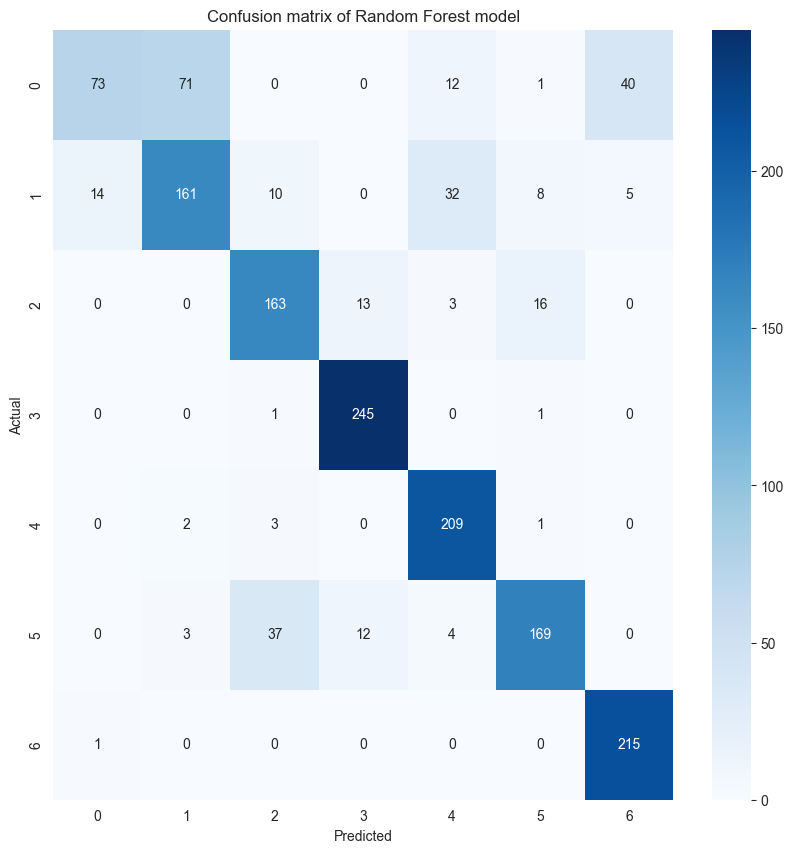

In [439]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=0,n_jobs=-1)
random_forest.fit(x_train_new_flt,y_train)
y_pred_test_random_forest = random_forest.predict(x_test_new_flt)
y_pred_val_random_forest = random_forest.predict(x_val_new_flt)
y_pred_train_random_forest = random_forest.predict(x_train_new_flt)
print('Accuracy of Random Forest on test set : ',accuracy_score(y_test,y_pred_test_random_forest))
print('Accuracy of Random Forest on train set : ',accuracy_score(y_train,y_pred_train_random_forest))
cm=confusion_matrix(y_test,y_pred_test_random_forest)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix of Random Forest model')
plt.show()

## Boosting

### XGBoost

Accuracy of XGBoost on test set :  0.8177049180327869
Accuracy of XGBoost on train set :  0.999275887038378


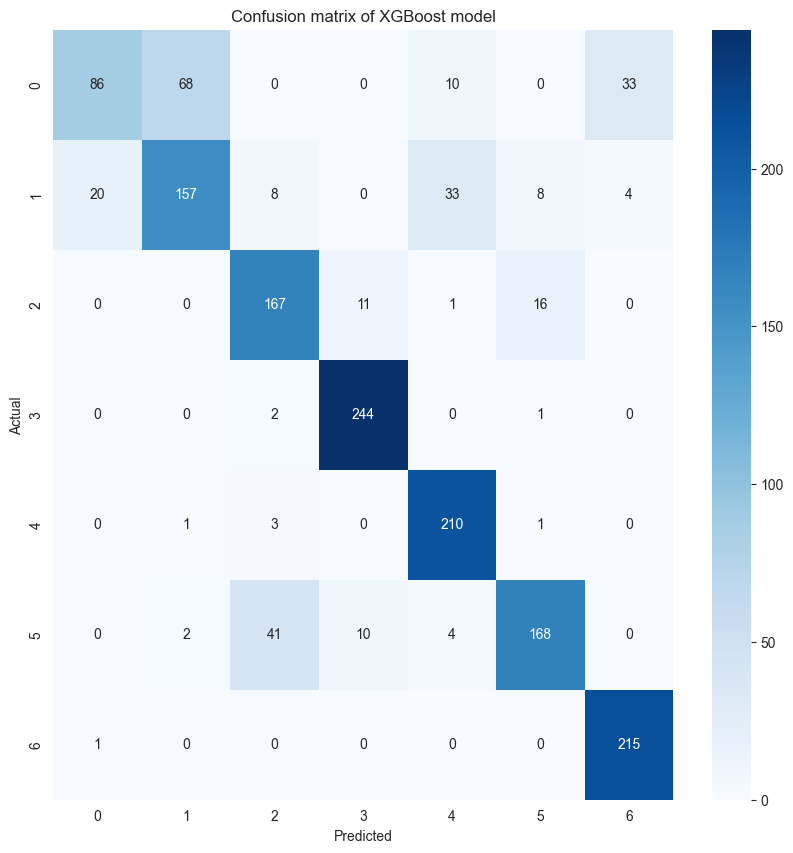

In [436]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=0,n_jobs=-1)
xgb.fit(x_train_new_flt,y_train-1)
y_pred_test_xgb = xgb.predict(x_test_new_flt)
y_pred_val_xgb = xgb.predict(x_val_new_flt)
y_pred_train_xgb = xgb.predict(x_train_new_flt)
print('Accuracy of XGBoost on test set : ',accuracy_score(y_test-1,y_pred_test_xgb))
print('Accuracy of XGBoost on train set : ',accuracy_score(y_train-1,y_pred_train_xgb))
cm=confusion_matrix(y_test-1,y_pred_test_xgb)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix of XGBoost model')
plt.show()

## Comparison to baseline

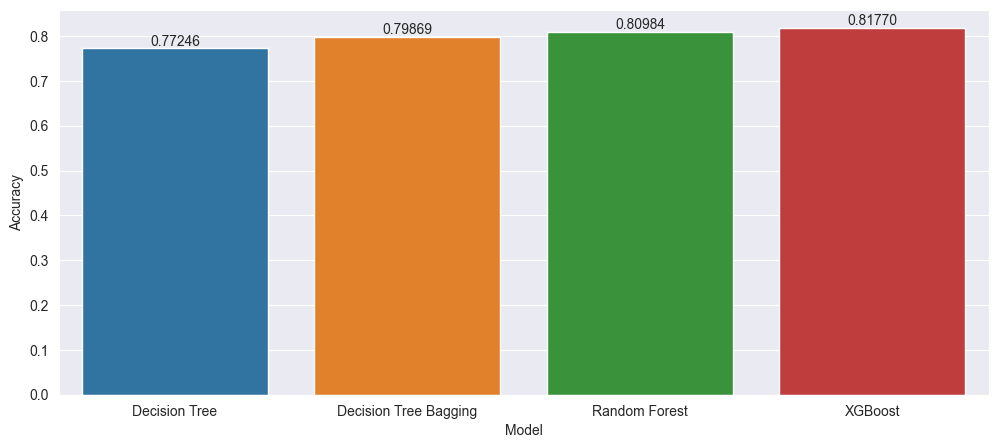

In [395]:
plt.figure(figsize=(12,5))
sns.barplot(x=['Decision Tree','Decision Tree Bagging','Random Forest','XGBoost'],y=[np.max(dt_test_result_flt),accuracy_score(y_test,y_pred_test_dt_bagging),accuracy_score(y_test,y_pred_test_random_forest),accuracy_score(y_test-1,y_pred_test_xgb)])
plt.text(0,np.max(dt_test_result_flt),f'{np.max(dt_test_result_flt):.5f}',ha='center',va='bottom')
plt.text(1,accuracy_score(y_test,y_pred_test_dt_bagging),f'{accuracy_score(y_test,y_pred_test_dt_bagging):.5f}',ha='center',va='bottom')
plt.text(2,accuracy_score(y_test,y_pred_test_random_forest),f'{accuracy_score(y_test,y_pred_test_random_forest):.5f}',ha='center',va='bottom')
plt.text(3,accuracy_score(y_test-1,y_pred_test_xgb),f'{accuracy_score(y_test-1,y_pred_test_xgb):.5f}',ha='center',va='bottom')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()


## Conclusion

<p style='font-size:24px'>Best Ensemble model is <span style='color:#865a5b'>XGboost with 49 feature -Filter Method-</span></p>

# Question 4

## Neural Network

In [411]:
import tensorflow as tf
from tensorflow import keras
from keras import layers,Sequential
def get_nn_model(n_class,input_shape,n_units=30,learning_rate=0.001):
    
    nn = Sequential([
        layers.Dense(n_units,activation='tanh',input_shape=(input_shape,)),
        layers.Dense(n_units,activation='tanh'),
        layers.Dense(n_units,activation='tanh'),
        layers.Dense(n_units,activation='tanh'),
        layers.Dense(n_class,activation='softmax')
    ])
    
    nn.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return nn

## PKI experiment

In [401]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from minisom import MiniSom

# use 6*6 , 7*7 , 8*8 , 9*9 , 10*10 , 11*11 , 12*12
shapes=[(6,6),(7,7),(8,8),(9,9),(10,10),(11,11),(12,12)]
pki_result = []
scaler = StandardScaler()
scaler.fit(x_train_new_flt)
scaled_x_train = scaler.transform(x_train_new_flt)
scaled_x_val = scaler.transform(x_val_new_flt)
scaled_x_test = scaler.transform(x_test_new_flt)
for shape in shapes:
    som = MiniSom(shape[0],shape[1],49,sigma=1.0,learning_rate=0.5)
    som.pca_weights_init(x_train_new_flt)
    som.train_random(x_train_new_flt,1000)
    
    supervised_ypred_train=y_pred_train_xgb
    unsupervised_ypred_train = np.array([som.winner(x) for x in x_train_new_flt])
    unsupervised_ypred_train= np.array([np.ravel_multi_index(x,shape) for x in unsupervised_ypred_train])

    
    supervised_ypred_test = y_pred_test_xgb
    unsupervised_ypred_test = np.array([som.winner(x) for x in x_test_new_flt])
    unsupervised_ypred_test= np.array([np.ravel_multi_index(x,shape) for x in unsupervised_ypred_test])

    
    supervised_ypred_val = y_pred_val_xgb
    unsupervised_ypred_val = np.array([som.winner(x) for x in x_val_new_flt])
    unsupervised_ypred_val= np.array([np.ravel_multi_index(x,shape) for x in unsupervised_ypred_val])


    new_x_train = pd.DataFrame({'unsupervised':unsupervised_ypred_train,'supervised':supervised_ypred_train})

    new_x_test = pd.DataFrame({'unsupervised':unsupervised_ypred_test,'supervised':supervised_ypred_test})

    new_x_val = pd.DataFrame({'unsupervised':unsupervised_ypred_val,'supervised':supervised_ypred_val})


    new_x_train = pd.get_dummies(new_x_train,columns=['supervised','unsupervised'],dtype=np.float32)
    new_x_test = pd.get_dummies(new_x_test,columns=['supervised','unsupervised'],dtype=np.float32)
    new_x_val = pd.get_dummies(new_x_val,columns=['supervised','unsupervised'],dtype=np.float32)

    
    
    

    nn_model = get_nn_model(7,new_x_train.shape[1],30,0.001)
    nn_model.fit(new_x_train,y_train-1,epochs=100,batch_size=32,validation_data=(new_x_val,y_val-1),verbose=0)
    print(f'Accuracy of nn model with {shape[0]}*{shape[1]} : ',accuracy_score(y_test-1,nn_model.predict(new_x_test).argmax(axis=1)))
    pki_result.append(nn_model.evaluate(new_x_test,y_test-1,verbose=0)[1])

48/48 [==============================] - 0s 1ms/step
Accuracy of nn model with 6*6 :  0.8177049180327869
48/48 [==============================] - 0s 714us/step
Accuracy of nn model with 7*7 :  0.8177049180327869
48/48 [==============================] - 0s 714us/step
Accuracy of nn model with 8*8 :  0.8177049180327869
48/48 [==============================] - 0s 731us/step
Accuracy of nn model with 9*9 :  0.8177049180327869
48/48 [==============================] - 0s 1ms/step
Accuracy of nn model with 10*10 :  0.8177049180327869
48/48 [==============================] - 0s 711us/step
Accuracy of nn model with 11*11 :  0.8177049180327869
48/48 [==============================] - 0s 1ms/step
Accuracy of nn model with 12*12 :  0.8177049180327869


## Plotting the result of PKI experiment

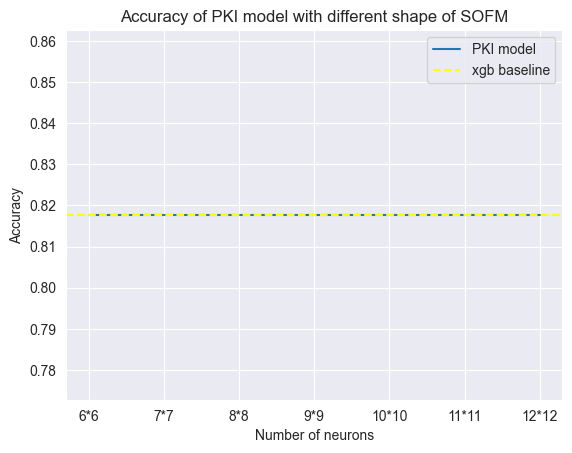

In [446]:

plt.plot(['6*6','7*7','8*8','9*9','10*10','11*11','12*12'],pki_result,label='PKI model')
plt.axhline(y=accuracy_score(y_test-1,y_pred_test_xgb),color='yellow',linestyle='--',label='xgb baseline')
plt.xlabel('Number of neurons')
plt.ylabel('Accuracy')
plt.title('Accuracy of PKI model with different shape of SOFM')
plt.legend()
plt.show()


## Conclusion

<p style='font-size:24px'>The PKI can't extract any additional features from the unsupervised results and different sofm shapes doesn't affect the PKI result</p> 

# Question 5

## Hyperparameter tuning

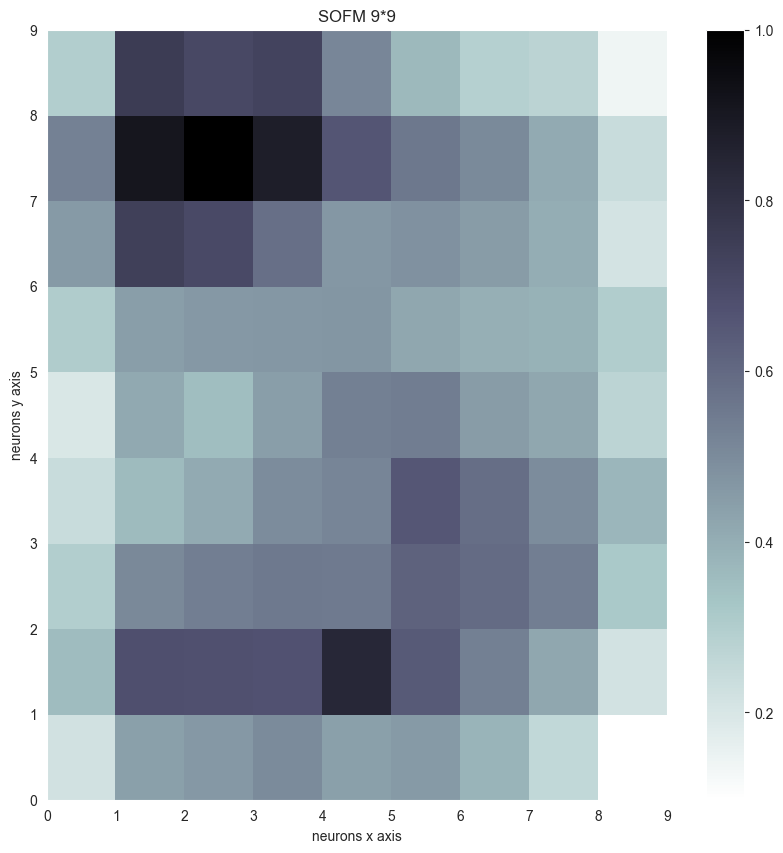

In [441]:
som=MiniSom(9,9,49,sigma=1.0,learning_rate=0.5)
som.random_weights_init(x_train_new_flt)
som.train_random(x_train_new_flt,1000)
plt.figure(figsize=(10,10))
plt.pcolor(som.distance_map().T,cmap='bone_r')
plt.xlabel('neurons x axis')
plt.ylabel('neurons y axis')
plt.title('SOFM 9*9')
plt.colorbar()
plt.show()
y_cluster_train = np.array([som.winner(x) for x in x_train_new_flt])
y_cluster_train = np.array([np.ravel_multi_index(x,(19,19)) for x in y_cluster_train])
y_cluster_test = np.array([som.winner(x) for x in x_test_new_flt])
y_cluster_test = np.array([np.ravel_multi_index(x,(19,19)) for x in y_cluster_test])
y_cluster_val = np.array([som.winner(x) for x in x_val_new_flt])
y_cluster_val = np.array([np.ravel_multi_index(x,(19,19)) for x in y_cluster_val])
y_pred_train = y_pred_train_xgb
y_pred_test = y_pred_test_xgb
y_pred_val = y_pred_val_xgb
pki_x_train = pd.DataFrame({'cluster':y_cluster_train,'supervised':y_pred_train})
pki_x_test = pd.DataFrame({'cluster':y_cluster_test,'supervised':y_pred_test})
pki_x_val = pd.DataFrame({'cluster':y_cluster_val,'supervised':y_pred_val})

In [450]:
from sklearn.model_selection import ParameterGrid


def create_dnn_model(hidden_layers, neurons, lr):
    dnn_model = tf.keras.Sequential()
    dnn_model.add(tf.keras.layers.Input(shape=(2,)))

    for i in range(hidden_layers):
        dnn_model.add(tf.keras.layers.Dense(neurons, activation='relu'))

    dnn_model.add(tf.keras.layers.Dense(7, activation='softmax'))  # 7 classes for the output layer

    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    dnn_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return dnn_model
# Define the hyperparameter grid
param_grid = {
    'hidden_layers': [2, 4],
    'neurons': [ 30, 90],
    'lr': [0.01, 0.001],
    'epochs': [100,200]
}

# Generate all combinations of hyperparameters
param_combinations = list(ParameterGrid(param_grid))

# Perform grid search
results = []

for params in param_combinations:
    hidden_layers = params['hidden_layers']
    neurons = params['neurons']
    lr = params['lr']
    epochs = params['epochs']
    print(f'Training model with {hidden_layers} hidden layers, {neurons} neurons in each hidden layer, learning rate = {lr} and {epochs} epochs')
    model = create_dnn_model(hidden_layers, neurons, lr)
    history = model.fit(pki_x_train, y_train-1, epochs=epochs, verbose=0)
    loss, accuracy = model.evaluate(pki_x_val, y_val-1, verbose=0)
    print(f'Validation accuracy: {accuracy}')
    results.append({
        'hidden_layers': hidden_layers,
        'neurons': neurons,
        'lr': lr,
        'epochs': epochs,
        'loss': loss,
        'accuracy': accuracy
    })
best_params = max(results, key=lambda x: x['accuracy'])
print("Best hyperparameters:")
print(best_params)

Training model with 2 hidden layers, 30 neurons in each hidden layer, learning rate = 0.01 and 100 epochs
Validation accuracy: 0.8190920948982239
Training model with 2 hidden layers, 90 neurons in each hidden layer, learning rate = 0.01 and 100 epochs
Validation accuracy: 0.7670226693153381
Training model with 2 hidden layers, 30 neurons in each hidden layer, learning rate = 0.001 and 100 epochs
Validation accuracy: 0.8190920948982239
Training model with 2 hidden layers, 90 neurons in each hidden layer, learning rate = 0.001 and 100 epochs
Validation accuracy: 0.8190920948982239
Training model with 4 hidden layers, 30 neurons in each hidden layer, learning rate = 0.01 and 100 epochs
Validation accuracy: 0.8184245824813843
Training model with 4 hidden layers, 90 neurons in each hidden layer, learning rate = 0.01 and 100 epochs
Validation accuracy: 0.1675567477941513
Training model with 4 hidden layers, 30 neurons in each hidden layer, learning rate = 0.001 and 100 epochs
Validation accu

## visualizing best result

48/48 [==============================] - 0s 763us/step
Accuracy of nn model with 2 hidden layers, 30 neurons in each hidden layer, learning rate = 0.01 and 100 epochs :  0.8177049180327869


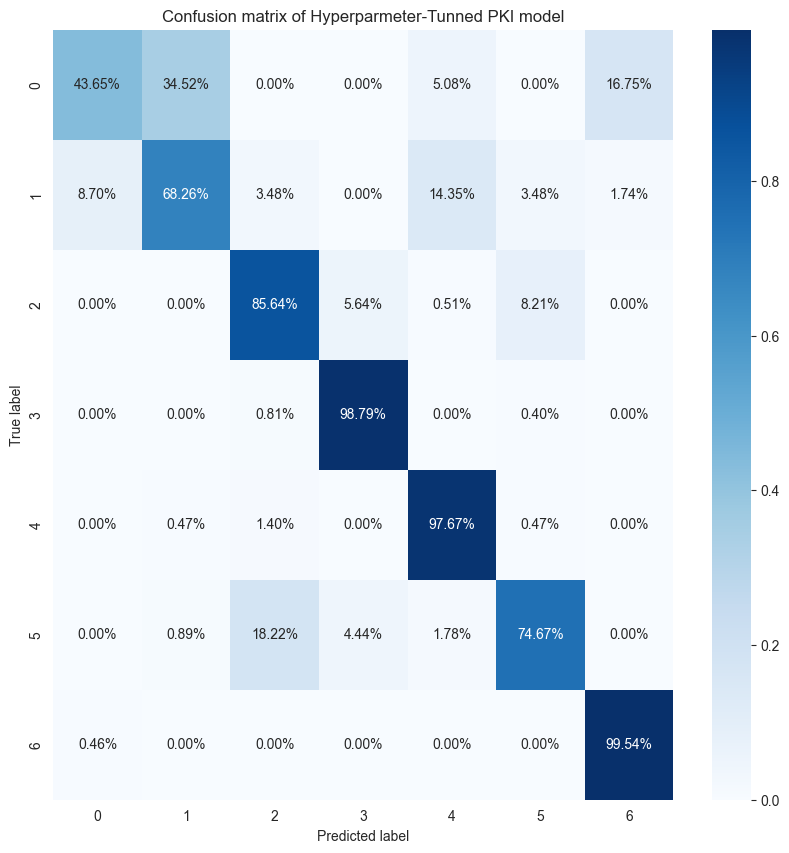

In [451]:
parameters={'hidden_layers': 2, 'neurons': 30, 'lr': 0.01, 'epochs': 100, 'loss': 4.669745445251465, 'accuracy': 0.8190920948982239}
dnn_model = create_dnn_model(parameters['hidden_layers'], parameters['neurons'], parameters['lr'])
dnn_model.fit(pki_x_train, y_train-1, epochs=parameters['epochs'], verbose=0)
y_pred=dnn_model.predict(pki_x_test).argmax(axis=1)
print(f'Accuracy of nn model with {parameters["hidden_layers"]} hidden layers, {parameters["neurons"]} neurons in each hidden layer, learning rate = {parameters["lr"]} and {parameters["epochs"]} epochs : ',accuracy_score(y_test-1,y_pred))
#plotting the confusion matrix with percentage
cm=confusion_matrix(y_test-1,y_pred)
cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='.2%',cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix of Hyperparmeter-Tunned PKI model')
plt.show()


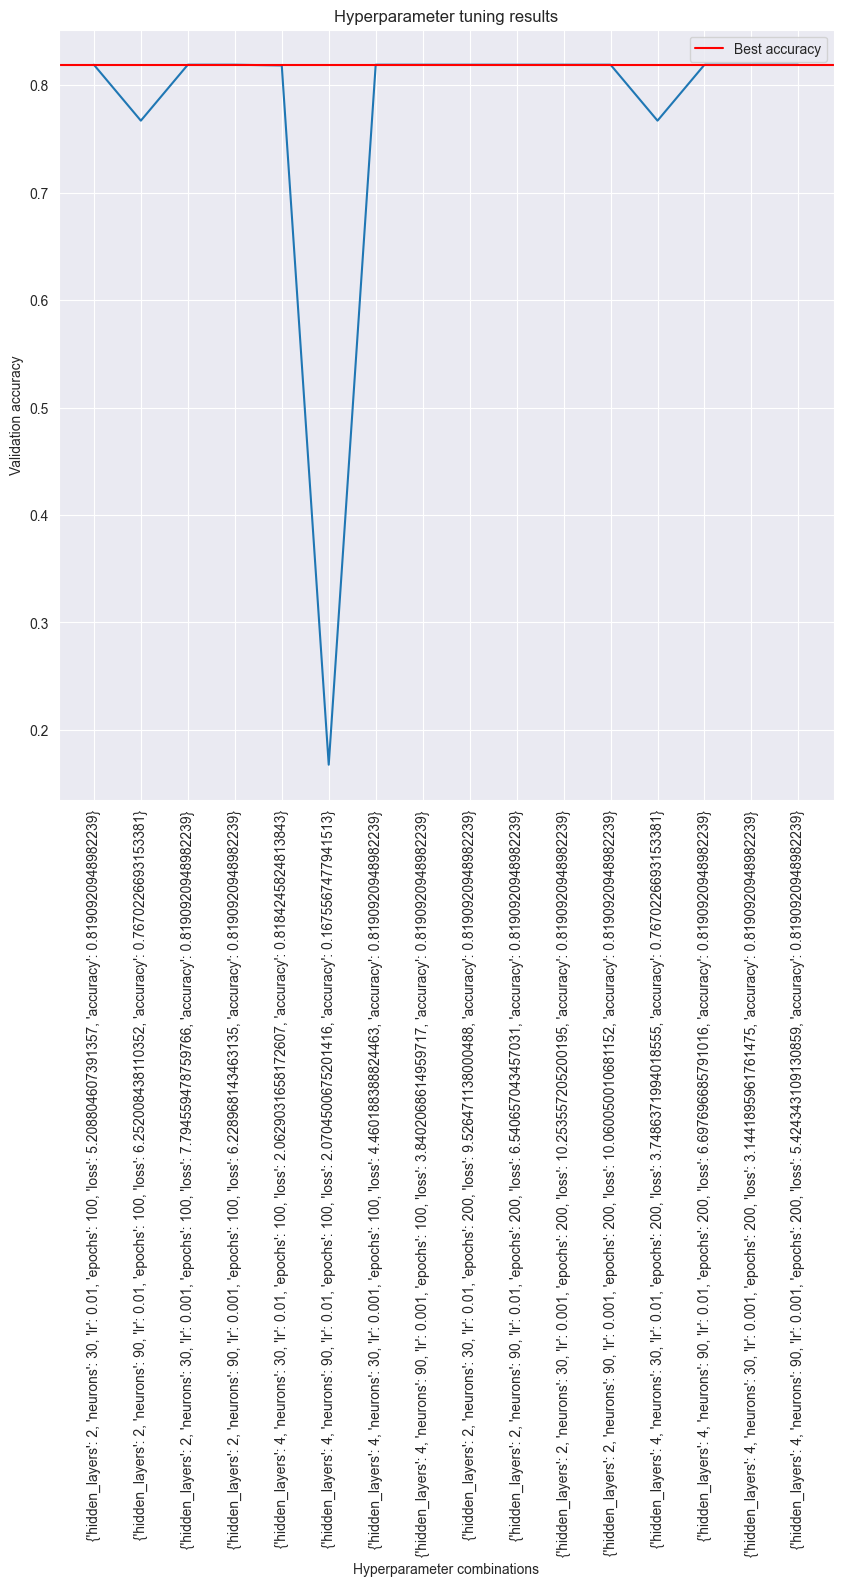

In [455]:
#plot each tuning result
plt.figure(figsize=(10,10))
plt.plot([x['accuracy'] for x in results])
plt.xticks(np.arange(len(results)), [str(x) for x in results], rotation=90)
plt.axhline(y=best_params['accuracy'], color='r', linestyle='-', label='Best accuracy')
plt.xlabel('Hyperparameter combinations')
plt.ylabel('Validation accuracy')
plt.title('Hyperparameter tuning results')
plt.legend()
plt.show()
# print(results)

 b## Conclusion

<p style='font-size:24px'>The best result is obtained by using the supervised learning result as the input of the neural network model. The accuracy of the model is 0.8191. The confusion matrix shows that the model can predict the class 2,3,4 and 6 very well, but it has a problem with class 0,1 and 5. The reason is that the number of samples in class 0,1 and 5 is very small. The model can't learn enough information from these classes. The model can't extract any additional features from the supervised and unsupervised results. The reason is that the supervised and unsupervised results are not related to each other. The supervised result is the prediction of the xgboost model, and the unsupervised result is the cluster of the som model. The PKI model can't extract any additional features from the unsupervised result.</p>